In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, SGDClassifier
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from scipy.sparse import csr_matrix

In [2]:
dtypes = {'nt_fp': str, 'event_date': str, 'a_month': str,
          's_price': float, 's_country': str, 
          's_adults': int, 's_children': int,
          'ip_lat': int, 'ip_long': int}


parse_dates = ['event_date']

data_df = pd.read_csv('~/Desktop/events-by-5-month.csv', index_col=False,  dtype=dtypes, parse_dates=parse_dates)

In [24]:
# вычисляем "глубину" поиска
# data_df['deep'] = ((data_df['s_datefrom'] - data_df['event_date'])).dt.days
# вычисляем часть дня
# data_df['part_of_day'] = data_df['hour_of_day']//3
# отделяем цель
y =  data_df['s_price']
# отделяем признаки
data_features = data_df.drop(columns=['s_price', 'event_date', 'nt_fp'
                                      
                                     ])
# заменяем категориальные признаки количественными (0 или 1)
# ohe = OneHotEncoder()
# X = ohe.fit(data_features)


data_dummies = pd.get_dummies(data_features)
# X = data_dummies
X = csr_matrix(data_dummies.values)
# создаём разреженную матрицу (без нулей). 
# На практике так не делают, т.к. неразреженная матрица 'а' может не поместиться в памяти
# X = csr_matrix(C)


In [40]:
data_df.shape

(1892847, 9)

In [25]:
# разделяем признаки и цели на учебные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [ ]:
scaler = StandardScaler()
# масштабируем данные
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

data_normalize = preprocessing.normalize(data_features)

X_norm = data_dummies.values

X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, random_state=17)


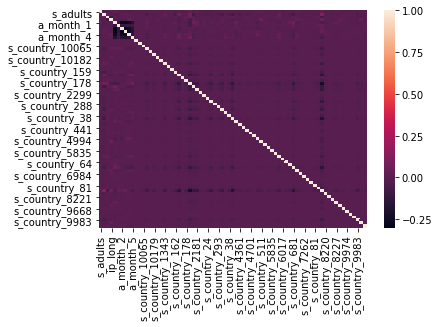

In [26]:
sns.heatmap(data_dummies.corr())

In [27]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [28]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# среднеквадратичная ошибка между ответами на тестовой выборке и прогнозами метода наименьших квадратов
np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)) )

88980.65514835579

In [10]:
pr = linreg.predict(X_test)
for k in pr:
    print(round(k, 2))

128693.64
116377.42
116377.42
68910.6
130879.9
118712.3
116476.51
73084.94
68910.6
118167.34
119356.35
116377.42
116377.42
235943.5
116377.42
116377.42
211311.06
107632.41
116377.42
116377.42
107632.41
163844.24
60165.59
116377.42
116377.42
68910.6
68910.6
244341.72
107632.41
116377.42
235893.96
120198.57
118464.59
176160.46
135261.02
124775.64
176160.46
68910.6
62351.85
116377.42
116377.42
68910.6
176160.46
235943.5
135261.02
116377.42
68910.6
219709.27
119802.23
127745.95
177405.41
116377.42
197663.41
77160.19
116377.42
116377.42
125568.31
114438.88
176160.46
121047.18
163844.24
118167.34
139385.81
119604.06
116377.42
116377.42
176160.46
122787.55
116922.39
68910.6
175212.77
116674.68
116377.42
116327.88
110710.43
235943.5
116476.51
116377.42
116377.42
120693.99
128693.64
188476.68
60165.59
176160.46
116377.42
116377.42
128693.64
116377.42
116377.42
75766.62
176160.46
237931.59
322132.13
135261.02
120551.76
116377.42
116377.42
127463.7
119059.1
69207.86
176160.46
116377.42
116674.68


116377.42
155099.23
283410.32
116823.3
116377.42
141522.52
176160.46
116377.42
128693.64
167656.77
177405.41
131334.39
176160.46
128693.64
120056.33
121146.27
116377.42
116575.59
116377.42
116377.42
116377.42
180334.8
121146.27
161657.99
161905.7
115429.73
72589.52
101312.75
116377.42
107632.41
116377.42
139534.44
107632.41
121146.27
60165.59
128693.64
214882.27
116377.42
116377.42
116377.42
116377.42
116377.42
68861.06
68910.6
107632.41
116922.39
123233.43
116377.42
188476.68
169552.16
176160.46
145343.67
118563.67
116377.42
116377.42
68910.6
242304.09
172134.75
121047.18
170700.25
128693.64
223627.28
201454.19
176160.46
295726.54
235943.5
131022.13
141671.15
242657.28
175212.77
75766.62
116377.42
116377.42
179731.67
176705.43
176160.46
182322.88
175212.77
176160.46
124775.64
116377.42
116377.42
235943.5
235943.5
116377.42
191117.43
176160.46
115429.73
235943.5
116377.42
107873.73
60165.59
67962.91
68910.6
123233.43
68910.6
123233.43
116377.42
286826.51
68910.6
133173.85
116377.42
176

116377.42
176160.46
183016.47
153838.74
163844.24
234004.96
242799.51
114785.68
116377.42
116327.88
174023.75
107632.41
116377.42
116377.42
94204.33
118167.34
107632.41
112351.71
175212.77
141522.52
96390.58
120198.57
116377.42
128792.73
295726.54
128693.64
115429.73
155099.23
116377.42
120842.62
135261.02
127745.95
123233.43
227198.49
116377.42
128693.64
116377.42
128693.64
116377.42
158177.24
107632.41
116377.42
176160.46
191067.89
121047.18
178247.63
75710.68
176160.46
123679.31
176160.46
116377.42
116377.42
137744.52
118953.62
116377.42
221029.68
123679.31
176110.92
116377.42
116377.42
116377.42
168018.58
116377.42
162896.54
135549.66
116377.42
116377.42
235943.5
121047.18
68910.6
234995.81
129238.61
116377.42
116377.42
174221.92
139385.81
116377.42
258951.89
134561.03
115429.73
116377.42
116377.42
135261.02
180929.31
116377.42
295726.54
235943.5
170700.25
179139.39
116377.42
116377.42
127209.6
70898.69
116377.42
68910.6
238030.67
191117.43
116377.42
116377.42
116327.88
120551.76
2

107632.41
116377.42
125122.43
116377.42
115429.73
176160.46
60406.91
172976.97
75766.62
135261.02
123679.31
116377.42
116327.88
117622.37
68910.6
71195.94
114191.17
116823.3
116377.42
176160.46
128693.64
68910.6
118464.59
239170.14
107632.41
116377.42
114191.17
176160.46
115429.73
116377.42
116922.39
242799.51
155099.23
271094.1
107632.41
116377.42
68910.6
176160.46
116377.42
235943.5
116377.42
116377.42
235943.5
116377.42
122985.72
223627.28
179387.1
179139.39
116377.42
75271.19
236488.47
145343.67
116377.42
117622.37
109125.07
116377.42
122539.84
135261.02
176160.46
116377.42
68910.6
116377.42
176160.46
139385.81
116377.42
176160.46
94055.7
169898.96
119052.71
116327.88
71889.53
235943.5
116377.42
177405.41
107675.56
115429.73
116377.42
68910.6
123233.43
107632.41
188476.68
116377.42
116377.42
116377.42
248259.72
250900.47
116377.42
167415.45
116377.42
163943.32
109818.66
117622.37
116377.42
244496.73
73084.94
116377.42
163844.24
68910.6
176160.46
135261.02
120693.99
70700.52
176160.

123134.35
116922.39
116377.42
113094.85
176160.46
115429.73
116377.42
126763.72
128693.64
115429.73
124775.64
116377.42
176705.43
238271.99
116377.42
197527.56
116377.42
128693.64
227241.64
176160.46
122738.01
139385.81
116476.51
117622.37
121096.72
242510.88
110215.0
116377.42
117170.1
176160.46
118705.91
176160.46
116426.96
71592.28
118365.51
235943.5
115429.73
117622.37
68910.6
176705.43
161905.7
120551.76
175163.22
123233.43
68910.6
69455.57
116377.42
118563.67
116377.42
178445.8
116377.42
116377.42
116377.42
116377.42
60165.59
60165.59
116922.39
109818.66
68910.6
133471.1
116377.42
116377.42
68910.6
193458.7
116327.88
223627.28
107632.41
176160.46
115677.44
116377.42
141522.52
123233.43
115429.73
178247.63
116377.42
107873.73
211485.07
116377.42
179139.39
116377.42
116377.42
116377.42
163794.7
176160.46
163844.24
119948.63
176160.46
118464.59
207110.09
116377.42
117671.91
176259.55
183016.47
258951.89
116377.42
235893.96
116377.42
173974.21
128693.64
116922.39
139385.81
139385.81


185347.19
141522.52
164281.5
115429.73
116327.88
128693.64
118514.13
116377.42
116377.42
68910.6
116377.42
116377.42
125072.89
115429.73
116377.42
116377.42
176259.55
235943.5
176160.46
116377.42
188476.68
116377.42
236637.09
116377.42
122440.76
115033.39
68910.6
68910.6
116922.39
67962.91
116377.42
126763.72
116377.42
107632.41
176160.46
103656.25
235943.5
172242.45
123233.43
107681.95
107632.41
116377.42
83867.58
123233.43
116377.42
163844.24
75766.62
116377.42
116377.42
88996.53
167613.62
163844.24
107632.41
176160.46
176160.46
176160.46
176110.92
124627.01
67962.91
103656.25
116377.42
116327.88
68910.6
114438.88
118415.05
235943.5
183959.47
195044.06
139385.81
176160.46
116377.42
128693.64
115033.39
77655.61
116377.42
116377.42
119894.92
69455.57
67962.91
120551.76
68910.6
128693.64
118365.51
235943.5
127804.11
116377.42
116922.39
116922.39
235943.5
141671.15
114785.68
240117.84
68910.6
161707.53
176160.46
116922.39
116377.42
179387.1
116377.42
174023.75
116377.42
235943.5
176457.7

176160.46
116377.42
116377.42
176160.46
176160.46
175212.77
116377.42
116377.42
116377.42
141522.52
122985.72
60165.59
123233.43
119356.35
116377.42
187132.65
155099.23
189088.42
117170.1
254827.1
176160.46
70551.89
116377.42
176160.46
115429.73
68910.6
115677.44
116377.42
176457.72
116377.42
167415.45
116377.42
116377.42
116377.42
116377.42
68910.6
110710.43
227198.49
116377.42
116377.42
116377.42
68910.6
116377.42
87794.2
174568.72
182727.84
195044.06
163844.24
97692.0
116377.42
115677.44
68861.06
134561.03
116377.42
68910.6
115677.44
112302.17
116377.42
144006.03
67962.91
128693.64
107632.41
116476.51
114438.88
139534.44
223924.53
279526.32
68910.6
176160.46
124775.64
167415.45
116377.42
116377.42
116377.42
116377.42
116377.42
235943.5
235943.5
116377.42
116377.42
191117.43
188476.68
179839.37
115429.73
126755.1
139385.81
139138.1
116377.42
68910.6
140058.0
107632.41
116377.42
283410.32
176358.63
191117.43
168018.58
166823.17
116377.42
172242.45
116377.42
75512.51
163844.24
176160.4

116377.42
68910.6
72137.24
116377.42
116377.42
116377.42
235943.5
199168.85
116377.42
116377.42
123233.43
176160.46
116377.42
107632.41
151405.31
116377.42
141522.52
162500.21
116922.39
174568.72
107675.56
135261.02
73629.9
68910.6
116377.42
116377.42
115033.39
218167.07
235943.5
107632.41
128693.64
115677.44
117622.37
120198.57
116377.42
116377.42
120551.76
116377.42
116476.51
115429.73
120551.76
116377.42
97741.54
128693.64
116377.42
223627.28
200146.91
68910.6
116377.42
176160.46
116377.42
176160.46
175163.22
116377.42
141671.15
163844.24
211311.06
69059.23
107632.41
244688.51
223222.33
116377.42
107675.56
116377.42
116377.42
163844.24
116377.42
110710.43
116377.42
179981.61
235943.5
125122.43
69207.86
223627.28
182223.8
104498.46
143857.4
111707.66
68910.6
151504.39
68910.6
116377.42
160007.55
116377.42
232372.29
139385.81
116377.42
116377.42
117622.37
139385.81
116823.3
235893.96
116377.42
116377.42
123233.43
175212.77
116377.42
117622.37
118705.91
68910.6
68910.6
75766.62
116377.

64835.35
167415.45
188773.94
119604.06
116377.42
274132.6
116377.42
176160.46
118365.51
234995.81
116377.42
116377.42
116377.42
116377.42
116377.42
68910.6
165634.15
119604.06
116377.42
116377.42
116377.42
68861.06
68910.6
68910.6
244341.72
116377.42
116377.42
113094.85
115429.73
116327.88
116377.42
135161.93
124775.64
115429.73
208028.48
163844.24
178148.55
116377.42
183016.47
116476.51
170939.35
176160.46
139385.81
175660.87
116377.42
119356.35
68910.6
235943.5
235943.5
121096.72
122738.01
184360.51
116377.42
135261.02
116377.42
118705.91
139385.81
280127.75
122787.55
116377.42
235893.96
116377.42
176160.46
116377.42
116377.42
116377.42
259050.98
116377.42
116377.42
176110.92
235943.5
127209.6
240117.84
116377.42
122738.01
176160.46
128693.64
116377.42
128553.63
228691.15
175212.77
114785.68
318734.93
115429.73
176160.46
170700.25
116476.51
116377.42
116377.42
128693.64
116377.42
179387.1
116377.42
116377.42
116377.42
116377.42
124775.64
116377.42
131334.39
71889.53
116377.42
120198.

131334.39
116377.42
68910.6
119356.35
68910.6
116476.51
116377.42
234995.81
176020.45
120198.57
116377.42
176160.46
182727.84
114438.88
162196.03
137744.52
191324.22
116377.42
120198.57
120551.76
116377.42
123233.43
234995.81
139385.81
123233.43
122440.76
116377.42
68910.6
116377.42
64835.35
134561.03
223627.28
124627.01
116377.42
128553.63
116377.42
291651.29
115033.39
131334.39
116377.42
107675.56
137880.37
107632.41
116377.42
176110.92
116377.42
135549.66
116674.68
176160.46
163844.24
163844.24
176457.72
107632.41
116377.42
124618.39
116377.42
112302.17
68910.6
116377.42
73084.94
68910.6
103656.25
113094.85
235943.5
116377.42
139336.27
116377.42
118464.59
151454.32
227448.43
116922.39
116377.42
139435.35
126763.72
107681.95
150118.9
176160.46
283410.32
77259.28
114438.88
116377.42
136902.3
180826.05
139385.81
116377.42
116377.42
178247.63
176160.46
116377.42
116377.42
135261.02
120842.62
182727.84
122738.01
128553.63
121294.89
176160.46
235243.52
110115.92
68910.6
378343.96
176160.4

137744.52
68910.6
116377.42
176160.46
163844.24
233806.79
60165.59
85707.03
234995.81
116674.68
118563.67
141671.15
116377.42
68910.6
126813.26
68910.6
63243.61
129238.61
176160.46
172093.83
240613.26
116377.42
116377.42
139484.9
116377.42
128693.64
122440.76
177405.41
188476.68
116377.42
116377.42
71047.31
144006.03
116377.42
176160.46
238030.67
116377.42
238030.67
116377.42
167415.45
123233.43
115033.39
116377.42
116377.42
68910.6
107873.73
91721.35
182521.05
234995.81
69455.57
116377.42
116377.42
115429.73
116377.42
176160.46
68910.6
119356.35
116377.42
73580.36
128693.64
227198.49
116922.39
116377.42
122979.33
121096.72
116377.42
68910.6
116377.42
116377.42
71239.09
116377.42
107632.41
70948.23
176160.46
60165.59
116377.42
77308.82
133462.49
235943.5
318511.37
68910.6
116377.42
167415.45
109818.66
116377.42
183016.47
235943.5
116823.3
179981.61
116377.42
116377.42
168563.54
172589.25
139385.81
143857.4
115429.73
116377.42
176160.46
178941.22
107632.41
116377.42
116377.42
116377.42


223627.28
116377.42
107632.41
116377.42
116377.42
172242.45
128693.64
116377.42
235993.04
176160.46
107632.41
116377.42
67962.91
116377.42
116377.42
128693.64
235943.5
123233.43
116377.42
167415.45
116377.42
116377.42
107632.41
109769.12
116377.42
122440.76
68910.6
68910.6
119948.63
231868.25
71592.28
176160.46
135261.02
116922.39
110710.43
123679.31
120551.76
115429.73
67962.91
133272.93
70997.77
116377.42
107632.41
68910.6
116377.42
70948.23
116377.42
242006.84
147577.24
116377.42
242006.84
166320.82
115479.27
122985.72
116377.42
116377.42
188476.68
176160.46
176160.46
116377.42
167415.45
119356.35
176160.46
116377.42
176160.46
107632.41
139138.1
235943.5
116377.42
187001.26
117962.78
176160.46
168239.66
235943.5
116377.42
77308.82
116377.42
115429.73
67962.91
68910.6
175163.22
176160.46
112302.17
113094.85
163844.24
116377.42
214537.7
117622.37
116377.42
116377.42
116971.93
110215.0
114191.17
295726.54
116377.42
163844.24
107632.41
177950.38
176160.46
155099.23
122341.67
116377.42
2

116377.42
116922.39
116377.42
116377.42
103656.25
176160.46
112351.71
195044.06
68910.6
162896.54
126813.26
128693.64
115677.44
116377.42
162896.54
116377.42
128693.64
107632.41
116377.42
125122.43
116377.42
116377.42
115429.73
91721.35
139385.81
115429.73
116377.42
117622.37
116377.42
153853.75
116377.42
118167.34
116377.42
116922.39
115429.73
116377.42
116377.42
116922.39
128553.63
68910.6
104498.46
176160.46
68910.6
190563.85
167415.45
124775.64
116377.42
107675.56
128693.64
109818.66
128693.64
116377.42
123233.43
149530.79
68910.6
116377.42
116377.42
116327.88
128693.64
116377.42
116377.42
107632.41
131334.39
122440.76
116922.39
176160.46
116377.42
135261.02
176160.46
176705.43
115429.73
176160.46
139534.44
116377.42
163844.24
115429.73
163844.24
123233.43
116377.42
68910.6
128633.54
175212.77
68910.6
96539.21
119604.06
116377.42
162896.54
116922.39
107632.41
119059.1
116377.42
124775.64
120551.76
237188.45
116377.42
235943.5
116377.42
128693.64
123183.89
151702.03
238922.43
197667

116377.42
60165.59
141522.52
107632.41
176160.46
75766.62
176705.43
116377.42
139385.81
176160.46
119102.25
116327.88
234319.45
188989.34
116377.42
193458.7
116377.42
116377.42
116377.42
178198.09
267018.85
121047.18
107632.41
116377.42
116377.42
68910.6
141522.52
223627.28
182874.24
235943.5
148779.57
68910.6
110710.43
141522.52
253241.74
117671.91
116377.42
122738.01
180681.59
116377.42
116377.42
116377.42
235943.5
118415.05
116327.88
68910.6
116377.42
116377.42
120551.76
183016.47
131717.95
176854.05
120551.76
179387.1
116922.39
107632.41
235943.5
116377.42
235943.5
68910.6
217919.36
107632.41
117622.37
107873.73
116377.42
107632.41
60165.59
176160.46
118563.67
160009.78
88996.53
116377.42
163844.24
68910.6
112302.17
116377.42
117467.35
240260.07
116377.42
115677.44
116377.42
234004.96
115380.18
195044.06
123233.43
235943.5
116377.42
176110.92
116377.42
120551.76
211311.06
124775.64
122440.76
116377.42
167458.6
239170.14
180929.31
116377.42
236042.59
116377.42
163844.24
116377.42
97

129981.74
139336.27
115677.44
174816.43
110710.43
167415.45
68910.6
116377.42
165881.87
115677.44
75766.62
116377.42
115429.73
112302.17
116377.42
176160.46
116377.42
176210.0
118415.05
116922.39
68910.6
201454.19
68910.6
242799.51
116377.42
116922.39
116922.39
112302.17
115429.73
116377.42
120601.3
62649.1
116377.42
115429.73
163844.24
124775.64
116377.42
120693.99
116377.42
115429.73
116377.42
295726.54
163844.24
116377.42
60165.59
227241.64
107632.41
91083.7
115429.73
176160.46
116674.68
211261.52
116377.42
170493.47
176160.46
163844.24
116377.42
116674.68
116377.42
116625.13
176160.46
128693.64
116377.42
116377.42
110710.43
163844.24
124775.64
116377.42
169898.96
125568.31
116377.42
283410.32
235943.5
116377.42
118415.05
126763.72
235943.5
116377.42
116377.42
116377.42
131334.39
238030.67
128693.64
176160.46
120452.67
141671.15
283410.32
211311.06
235943.5
107632.41
116377.42
116377.42
114438.88
120198.57
116823.3
163844.24
77308.82
179731.67
296271.51
188476.68
116377.42
116674.68

223627.28
116377.42
116377.42
235943.5
172877.89
116377.42
115033.39
163844.24
119356.35
137091.86
184558.68
116377.42
176160.46
121047.18
128693.64
116377.42
175212.77
116377.42
159174.48
139138.1
60165.59
235943.5
107632.41
116377.42
176160.46
56183.04
116922.39
143857.4
116377.42
119059.1
116327.88
116377.42
116377.42
182223.8
128693.64
139385.81
119802.23
116377.42
110710.43
116377.42
116377.42
176160.46
118563.67
68910.6
116377.42
128693.64
116377.42
92897.06
176160.46
223627.28
155099.23
116377.42
116377.42
116377.42
235943.5
116922.39
116377.42
116377.42
115677.44
116377.42
135261.02
116377.42
68910.6
161905.7
222679.58
83867.58
107632.41
73679.45
123233.43
176160.46
120693.99
116922.39
112302.17
122738.01
116377.42
116377.42
128743.19
68910.6
128743.19
139385.81
176160.46
188575.77
175460.48
60165.59
178801.21
68910.6
116377.42
116377.42
116377.42
116377.42
116377.42
123233.43
184905.47
139385.81
127995.88
170493.47
118464.59
116327.88
116377.42
115429.73
242304.09
116377.42
17

116377.42
107632.41
116377.42
116377.42
116377.42
63243.61
176160.46
116377.42
116377.42
236488.47
107632.41
139385.81
227043.47
307543.17
128693.64
163844.24
139385.81
119504.98
68910.6
250900.47
239170.14
233806.79
107632.41
128693.64
176160.46
116922.39
176160.46
131334.39
92067.62
176160.46
211311.06
116377.42
117622.37
123233.43
128693.64
116377.42
116377.42
107632.41
116377.42
235943.5
116377.42
116327.88
116377.42
144006.03
77308.82
163844.24
176160.46
170700.25
116377.42
148779.57
116377.42
234995.81
116476.51
186852.63
175460.48
163844.24
116922.39
195044.06
60165.59
116377.42
135995.54
139385.81
134601.96
116377.42
107632.41
116377.42
168365.37
68910.6
235943.5
116377.42
176160.46
163844.24
118167.34
148167.58
139385.81
163844.24
118563.67
116377.42
69356.48
116377.42
176606.34
116377.42
115429.73
88996.53
116377.42
176160.46
68910.6
128693.64
119604.06
119802.23
69604.2
163844.24
239170.14
115429.73
116377.42
116377.42
110710.43
139484.9
75320.73
176705.43
114438.88
123233.4

128693.64
116377.42
116377.42
107632.41
178198.09
115677.44
115677.44
252839.01
116377.42
235943.5
235943.5
115429.73
178247.63
114191.17
83867.58
115033.39
135261.02
184410.05
116922.39
116377.42
100700.76
116377.42
116922.39
128693.64
167415.45
188476.68
176160.46
116377.42
72137.24
116377.42
119604.06
116377.42
139385.81
107632.41
122738.01
235943.5
127993.66
116377.42
116922.39
116377.42
116278.34
163844.24
119102.25
124627.01
177950.38
116377.42
118563.67
135261.02
116377.42
116377.42
116377.42
123233.43
68910.6
234995.81
128693.64
116377.42
122440.76
116377.42
128693.64
77308.82
234995.81
235943.5
189021.65
227198.49
135211.47
116377.42
126763.72
103649.85
116377.42
176160.46
107632.41
126763.72
116327.88
68910.6
235943.5
283410.32
107632.41
116377.42
120693.99
116377.42
286636.96
178842.14
68910.6
176408.17
116377.42
120551.76
116377.42
67566.57
116377.42
116377.42
222679.58
119059.1
107632.41
116377.42
135261.02
183016.47
73084.94
211261.52
72137.24
176160.46
176160.46
235943.5

128693.64
116922.39
104498.46
257310.6
68910.6
235943.5
68910.6
68910.6
167656.77
283410.32
123679.31
116377.42
169898.96
235943.5
283955.28
116377.42
116377.42
125122.43
116377.42
68910.6
118464.59
176160.46
176160.46
175212.77
116377.42
130731.27
116377.42
127853.65
116377.42
283410.32
139385.81
167415.45
116377.42
116377.42
116377.42
119356.35
68910.6
235893.96
116377.42
91918.99
176160.46
167415.45
116377.42
114240.71
235943.5
68910.6
107632.41
116377.42
127745.95
116377.42
235943.5
175460.48
139484.9
116377.42
116377.42
116377.42
223627.28
176160.46
116377.42
107632.41
128693.64
116377.42
75766.62
167415.45
116377.42
107632.41
122440.76
116377.42
116377.42
107632.41
114438.88
116377.42
124775.64
118415.05
116377.42
176160.46
176160.46
116377.42
116377.42
235943.5
107632.41
176160.46
116377.42
128553.63
112351.71
115429.73
118464.59
180879.76
176160.46
122985.72
107632.41
123233.43
124726.09
116377.42
139534.44
116377.42
176160.46
124627.01
176160.46
107632.41
117170.1
215627.63
17

119356.35
116377.42
126763.72
124577.47
176160.46
239170.14
188377.6
119102.25
128693.64
236488.47
176160.46
116377.42
90413.55
168901.72
141522.52
117622.37
223222.33
183313.73
139385.81
116377.42
119356.35
124775.64
119356.35
128693.64
163844.24
121096.72
68910.6
235943.5
126763.72
122738.01
116377.42
258951.89
116377.42
148167.58
60165.59
103507.62
77451.05
167665.39
68910.6
116377.42
179585.27
107632.41
68910.6
176160.46
116377.42
163844.24
112351.71
116377.42
116377.42
188683.47
116377.42
60165.59
176160.46
227198.49
116377.42
118464.59
128194.05
242006.84
116377.42
68910.6
116377.42
176160.46
116377.42
153252.85
68910.6
116377.42
139336.27
107632.41
235943.5
127995.88
163844.24
116377.42
112302.17
176160.46
116377.42
116377.42
126763.72
235943.5
158177.24
116377.42
68910.6
121047.18
223627.28
175212.77
116674.68
91721.35
135261.02
68910.6
235943.5
203789.07
116674.68
141522.52
235943.5
116377.42
118167.34
90413.55
176160.46
176705.43
121096.72
116327.88
116377.42
116377.42
126556

116377.42
116327.88
116377.42
139385.81
77655.61
235943.5
115429.73
116377.42
176160.46
116823.3
168018.58
123233.43
163844.24
235943.5
91083.7
115429.73
107632.41
121096.72
115429.73
176160.46
163844.24
60165.59
176160.46
68910.6
128693.64
121146.27
119356.35
176160.46
68910.6
68861.06
223627.28
107632.41
116377.42
116377.42
116377.42
235943.5
116377.42
115429.73
116377.42
127993.66
116377.42
116377.42
121146.27
67566.57
116377.42
68910.6
116377.42
116377.42
120551.76
120693.99
176160.46
123233.43
116922.39
116377.42
116377.42
107632.41
235943.5
116377.42
232660.93
234004.96
107632.41
68910.6
107632.41
116377.42
119604.06
188476.68
116377.42
67962.91
116377.42
116377.42
109719.58
119991.78
242006.84
107681.95
77160.19
116377.42
176160.46
116674.68
108763.27
182521.05
116377.42
176110.92
68910.6
176160.46
128693.64
183016.47
175460.48
123233.43
128553.63
121047.18
163844.24
179981.61
164389.2
144006.03
109769.12
67913.37
119356.35
77308.82
118415.05
114191.17
116377.42
176160.46
139385

139534.44
116377.42
117622.37
68910.6
116377.42
113293.02
116377.42
116377.42
176110.92
116922.39
179981.61
172242.45
124775.64
182727.84
116377.42
116476.51
116377.42
116377.42
68910.6
115429.73
118514.13
116377.42
116476.51
107632.41
283410.32
235943.5
68910.6
116377.42
116377.42
242304.09
107675.56
116377.42
116377.42
223627.28
107632.41
72731.75
188476.68
242799.51
116377.42
128693.64
235943.5
107632.41
115429.73
135261.02
107632.41
116377.42
121146.27
116377.42
128693.64
68910.6
116377.42
122985.72
116377.42
116922.39
128792.73
233806.79
116377.42
119356.35
188476.68
176160.46
109769.12
120551.76
116377.42
153838.74
119356.35
60165.59
107632.41
116377.42
159768.99
123233.43
161905.7
172143.37
163844.24
116377.42
141522.52
178198.09
239170.14
116377.42
176705.43
176160.46
116426.96
120551.76
183016.47
135261.02
217365.78
244341.72
197527.56
223627.28
258951.89
116377.42
116377.42
115429.73
231917.79
123233.43
263473.02
118514.13
115429.73
68861.06
116377.42
107632.41
117622.37
1156

116377.42
119356.35
180879.76
176160.46
116377.42
116377.42
116377.42
176160.46
107632.41
107632.41
116377.42
107632.41
234995.81
115429.73
70997.77
118415.05
139385.81
144006.03
172877.89
68910.6
234995.81
119059.1
182223.8
158177.24
121096.72
116377.42
116377.42
116377.42
123233.43
175462.7
180477.03
107632.41
116823.3
116327.88
116377.42
116377.42
75766.62
116377.42
131334.39
144006.03
116377.42
60165.59
176160.46
130483.56
235943.5
235943.5
176210.0
116377.42
230483.29
122539.84
107632.41
116377.42
57725.24
116377.42
80244.6
121047.18
235943.5
116377.42
176160.46
116377.42
141522.52
120898.55
211410.14
133675.66
116377.42
137880.37
116773.76
116377.42
68910.6
116377.42
184558.68
116327.88
115429.73
68910.6
235193.98
235943.5
116377.42
116922.39
235943.5
115429.73
88996.53
116377.42
115429.73
116377.42
116377.42
68910.6
68910.6
116377.42
115677.44
120551.76
107632.41
68910.6
148779.57
116377.42
116377.42
235943.5
176160.46
71889.53
135261.02
120551.76
118167.34
119356.35
115429.73
1

162896.54
176705.43
116476.51
170700.25
119991.78
68910.6
176160.46
163844.24
119604.06
116377.42
116377.42
122985.72
176160.46
119948.63
137744.52
116922.39
115429.73
115033.39
116377.42
244184.47
116377.42
107632.41
68910.6
68910.6
188476.68
163844.24
176160.46
71047.31
124726.09
96390.58
68910.6
176160.46
116377.42
116377.42
116377.42
123233.43
141671.15
107632.41
176160.46
176160.46
116377.42
116377.42
187587.15
157475.04
235943.5
116377.42
118563.67
234995.81
75320.73
116377.42
69009.69
141522.52
234004.96
137880.37
139385.81
119356.35
116377.42
107632.41
116377.42
115677.44
77655.61
127995.88
211311.06
116377.42
186852.63
187524.82
235943.5
125122.43
68960.15
116377.42
227198.49
131334.39
97741.54
66160.21
133173.85
170452.54
116377.42
178247.63
110215.0
125122.43
115429.73
107632.41
139534.44
135261.02
176854.05
116377.42
71889.53
182322.88
116377.42
176160.46
116377.42
128693.64
231818.71
116377.42
122985.72
107632.41
135261.02
176160.46
116377.42
75766.62
176160.46
135407.42
1

69455.57
116922.39
116377.42
120551.76
112302.17
123233.43
116377.42
114191.17
115677.44
116377.42
115429.73
116922.39
176160.46
128644.1
223627.28
120551.76
139633.52
128693.64
116377.42
116377.42
116377.42
114191.17
115429.73
234995.81
116377.42
116377.42
116377.42
68910.6
139385.81
176160.46
116377.42
223627.28
175460.48
116377.42
115429.73
246329.8
60165.59
163844.24
189170.28
116377.42
121047.18
163844.24
175212.77
128693.64
186546.76
114240.71
184558.68
121146.27
180334.8
179387.1
97741.54
115429.73
155099.23
131672.57
116377.42
163844.24
116377.42
176160.46
227198.49
116377.42
128743.19
64835.35
107632.41
119604.06
141621.61
124775.64
176160.46
99574.6
161905.7
116377.42
139385.81
235943.5
119356.35
135261.02
116377.42
139385.81
120551.76
116377.42
41529.71
242657.28
107632.41
227241.64
100472.76
116377.42
238668.33
107632.41
116377.42
116377.42
116377.42
176160.46
155099.23
128644.1
116823.3
235943.5
116377.42
176160.46
68910.6
116377.42
114785.68
116377.42
116377.42
223577.74


124775.64
128693.64
157475.04
116377.42
174816.43
116377.42
122143.5
176160.46
107632.41
68910.6
116377.42
116377.42
231868.25
116922.39
112252.63
116377.42
235993.04
76063.87
203640.44
177405.41
242304.09
141522.52
116377.42
116377.42
235943.5
107632.41
116377.42
116327.88
116377.42
68910.6
122539.84
235943.5
68910.6
116377.42
68910.6
99779.16
123233.43
184905.47
116823.3
107632.41
66724.35
120693.99
114438.88
116823.3
116327.88
116377.42
131334.39
128553.63
94855.3
107632.41
116377.42
116377.42
68910.6
116377.42
116377.42
107632.41
227448.43
176160.46
139534.44
118415.05
107632.41
107632.41
116377.42
68910.6
162847.0
120551.76
176160.46
295726.54
123233.43
116377.42
139385.81
116674.68
176160.46
128693.64
122440.76
64835.35
135211.47
235943.5
122979.33
110710.43
116327.88
180477.03
235943.5
67962.91
163844.24
147239.06
122440.76
254827.1
179139.39
116426.96
163844.24
188476.68
116377.42
118167.34
116327.88
113094.85
283459.86
233757.25
115677.44
116377.42
106486.02
116922.39
116377.4

116377.42
176160.46
195044.06
231917.79
120551.76
116377.42
116377.42
163844.24
116922.39
116377.42
116377.42
116377.42
113094.85
123233.43
150916.28
116377.42
116377.42
116377.42
56189.43
122837.09
68910.6
116377.42
116823.3
116377.42
176160.46
116327.88
176457.72
116377.42
125568.31
176160.46
115429.73
235883.4
180830.22
176160.46
116377.42
233757.25
115429.73
116377.42
128553.63
119059.1
224172.24
116377.42
116922.39
125122.43
143857.4
223627.28
235943.5
116377.42
176160.46
199168.85
68910.6
124775.64
116377.42
114339.8
127745.95
116823.3
123233.43
68910.6
123233.43
115429.73
68910.6
116377.42
128194.05
77308.82
116922.39
118464.59
175460.48
128693.64
115231.56
163844.24
175460.48
107873.73
116377.42
116377.42
110710.43
123233.43
116377.42
131334.39
68910.6
133158.84
116674.68
115429.73
120551.76
127556.4
68861.06
119604.06
176160.46
131334.39
176110.92
116377.42
135261.02
116377.42
116377.42
107632.41
116377.42
116377.42
68910.6
116377.42
179981.61
116377.42
235943.5
68910.6
116377

165717.7
115033.39
116377.42
124775.64
168563.54
176160.46
116377.42
118415.05
116575.59
235893.96
176160.46
114488.42
176160.46
128693.64
116377.42
254827.1
128693.64
114191.17
196874.9
116377.42
235243.52
235943.5
68910.6
116377.42
181926.54
115380.18
118464.59
113094.85
125411.07
123233.43
116377.42
306418.71
116377.42
116377.42
107632.41
116377.42
155099.23
176160.46
116377.42
191117.43
68910.6
116377.42
120842.62
223924.53
116377.42
240260.07
112302.17
123233.43
176160.46
222679.58
109769.12
68910.6
131334.39
128693.64
116922.39
151123.06
131717.95
120551.76
103649.85
68910.6
117622.37
118464.59
116823.3
115677.44
176160.46
176160.46
128693.64
119356.35
116377.42
123530.69
115429.73
116377.42
107632.41
124627.01
235893.96
116377.42
236488.47
88996.53
235893.96
69009.69
139138.1
137880.37
176160.46
68910.6
68910.6
116377.42
120198.57
128194.05
116377.42
116377.42
163844.24
50274.72
118167.34
141522.52
116476.51
118415.05
116377.42
121047.18
116377.42
107675.56
116377.42
116377.42
1

115677.44
118464.59
116377.42
201305.56
68910.6
110215.0
116377.42
183016.47
178346.71
116377.42
235943.5
116377.42
175460.48
176160.46
219552.03
167415.45
135261.02
116377.42
116377.42
176160.46
97692.0
116922.39
116377.42
119356.35
176160.46
139385.81
116377.42
230427.36
116377.42
116377.42
128693.64
116377.42
115429.73
148779.57
116377.42
68910.6
144006.03
122985.72
116377.42
116377.42
125122.43
250900.47
125122.43
119604.06
107632.41
116377.42
116377.42
116922.39
91083.7
116377.42
115429.73
182768.76
116377.42
235943.5
112252.63
107632.41
110115.92
172877.89
68910.6
135261.02
124775.64
125411.07
116377.42
163844.24
116377.42
116922.39
128693.64
176160.46
116773.76
116327.88
116377.42
176160.46
116377.42
116377.42
210611.07
283410.32
180334.8
139385.81
116377.42
163844.24
115528.81
123530.69
235943.5
123233.43
118514.13
107632.41
68910.6
116377.42
178198.09
116377.42
163844.24
116377.42
116377.42
116377.42
295726.54
116377.42
237188.45
141621.61
116377.42
234995.81
116377.42
163844.

116377.42
116377.42
147239.06
240613.26
235943.5
107632.41
109769.12
124775.64
132514.79
176160.46
68910.6
116377.42
128693.64
116922.39
120198.57
116377.42
162896.54
116377.42
117622.37
165881.87
124775.64
116377.42
232660.93
116377.42
116377.42
176160.46
128553.63
235943.5
163844.24
116377.42
234995.81
185293.19
176160.46
116377.42
87794.2
176160.46
68910.6
116922.39
123233.43
116377.42
60406.91
176160.46
68910.6
120551.76
110710.43
116377.42
116377.42
221441.03
68910.6
223627.28
116377.42
137744.52
116377.42
176160.46
118705.91
68910.6
116674.68
163844.24
107632.41
176160.46
167665.39
135261.02
68910.6
103656.25
164290.12
68910.6
77160.19
60165.59
116377.42
116377.42
227198.49
116377.42
119059.1
124775.64
176457.72
180334.8
176160.46
176160.46
116377.42
116327.88
116377.42
167415.45
131334.39
163844.24
116377.42
68910.6
75766.62
184558.68
176160.46
116377.42
263423.48
115429.73
125122.43
226853.92
116674.68
125122.43
122285.74
123233.43
166170.5
147577.24
116377.42
116823.3
116377.4

128693.64
116377.42
235943.5
143906.94
133173.85
116377.42
175212.77
115429.73
68910.6
295726.54
107632.41
184558.68
73084.94
73084.94
119356.35
295726.54
160483.8
139534.44
116377.42
116377.42
235943.5
116377.42
110710.43
235943.5
116377.42
116377.42
235893.96
116377.42
295726.54
240712.35
237931.59
115429.73
123233.43
183016.47
116377.42
116377.42
128644.1
176160.46
115677.44
116377.42
128693.64
117516.89
235943.5
116377.42
110115.92
116674.68
116377.42
137438.65
116327.88
235943.5
127209.6
68910.6
128693.64
116377.42
123233.43
75766.62
116377.42
119356.35
107632.41
176160.46
97741.54
116377.42
176160.46
116377.42
116377.42
214925.42
116377.42
116377.42
116327.88
116377.42
125122.43
68910.6
115429.73
167415.45
107632.41
124618.39
191117.43
176309.09
116377.42
116377.42
124775.64
131334.39
77308.82
163844.24
68210.62
128693.64
151702.03
163844.24
172242.45
128633.54
115429.73
116922.39
119158.18
107632.41
117566.44
290266.33
139385.81
116377.42
147577.24
240712.35
116377.42
176160.46


176160.46
116922.39
115677.44
231917.79
175212.77
176160.46
116377.42
115380.18
116377.42
116377.42
68910.6
69207.86
119604.06
116377.42
163844.24
79296.9
166525.92
116377.42
116377.42
107632.41
184558.68
116377.42
133675.66
131672.57
184410.05
116377.42
180830.22
122539.84
137438.65
176606.34
182727.84
176160.46
141522.52
107632.41
116327.88
116377.42
123233.43
223627.28
176160.46
223627.28
176160.46
68910.6
118464.59
188416.58
116377.42
116377.42
128693.64
119604.06
172589.25
60165.59
163844.24
235943.5
120198.57
116377.42
176160.46
116377.42
116377.42
116377.42
139336.27
128693.64
116377.42
75766.62
117622.37
163844.24
116377.42
141522.52
116377.42
113627.03
125568.31
176160.46
130483.56
123679.31
116674.68
116377.42
124775.64
120551.76
68910.6
176160.46
173974.21
237981.13
159768.99
116278.34
123233.43
68210.62
116377.42
116922.39
115429.73
116377.42
116377.42
116377.42
179774.82
116377.42
116377.42
178842.14
120198.57
116377.42
116377.42
189021.65
125122.43
68910.6
176457.72
11637

122787.55
128194.05
247760.13
116327.88
139385.81
68910.6
137880.37
107632.41
116922.39
125122.43
116327.88
143857.4
125568.31
235943.5
235943.5
109967.29
295726.54
133272.93
116377.42
116377.42
116327.88
116377.42
116377.42
104498.46
116377.42
133223.39
110710.43
116377.42
68910.6
107632.41
116377.42
122738.01
116377.42
139385.81
116377.42
118415.05
119207.72
235943.5
234995.81
68861.06
131022.13
183016.47
116377.42
104498.46
122440.76
69356.48
163844.24
141671.15
116377.42
176160.46
116377.42
135261.02
171490.7
145343.67
124775.64
135261.02
176160.46
167464.99
128693.64
116377.42
116922.39
235943.5
116377.42
116377.42
176160.46
116327.88
114240.71
70700.52
199119.31
68910.6
119802.23
119604.06
176160.46
235943.5
114240.71
115429.73
120551.76
77308.82
119059.1
116377.42
131334.39
116377.42
116377.42
139385.81
116377.42
188476.68
116377.42
116377.42
68910.6
118464.59
116377.42
116377.42
191324.22
116377.42
170749.79
116377.42
120551.76
116922.39
107632.41
128693.64
176160.46
115033.39


141522.52
176160.46
116377.42
119604.06
235943.5
221697.35
119059.1
116377.42
116377.42
116327.88
112252.63
115677.44
116377.42
116377.42
107632.41
178247.63
167415.45
176160.46
235943.5
163844.24
173410.07
68910.6
116377.42
116377.42
170204.83
167070.88
148038.13
116377.42
119158.18
116377.42
116377.42
116377.42
107675.56
120898.55
116377.42
116377.42
135261.02
176160.46
163844.24
163844.24
163844.24
116377.42
116377.42
128693.64
184558.68
128644.1
235943.5
121096.72
214289.99
114191.17
115429.73
68910.6
107632.41
176160.46
234351.76
116377.42
47388.48
176160.46
163844.24
176160.46
69009.69
107632.41
180235.71
116377.42
116377.42
175212.77
235943.5
68910.6
176160.46
116377.42
172877.89
116377.42
112351.71
116377.42
62748.18
116377.42
180334.8
68910.6
163844.24
115429.73
116377.42
176160.46
250900.47
116377.42
175212.77
176160.46
91721.35
116377.42
135261.02
119356.35
67962.91
116426.96
119059.1
116377.42
119604.06
116377.42
153903.29
116377.42
235893.96
116377.42
120693.99
176160.46
6

144006.03
116377.42
68910.6
235943.5
183016.47
115429.73
168018.58
116377.42
116377.42
163844.24
163844.24
163844.24
116377.42
107632.41
68910.6
261788.58
116377.42
68910.6
176160.46
176160.46
116377.42
116377.42
176160.46
119356.35
116377.42
235943.5
188476.68
116377.42
118167.34
177405.41
120198.57
122738.01
235943.5
116377.42
116377.42
116377.42
77308.82
116377.42
116377.42
118761.84
107632.41
116377.42
75766.62
163844.24
127795.49
116377.42
116674.68
107632.41
116377.42
123233.43
139385.81
116377.42
165881.87
116377.42
116922.39
128693.64
70997.77
139534.44
68910.6
122837.09
68910.6
176160.46
60165.59
123883.87
116674.68
116377.42
68910.6
68910.6
238668.33
176160.46
223627.28
115429.73
116377.42
116377.42
112302.17
235943.5
116377.42
179139.39
115429.73
271094.1
123233.43
107632.41
107632.41
237733.42
116377.42
68910.6
119948.63
235893.96
107632.41
123679.31
128693.64
68910.6
167415.45
163844.24
60165.59
119158.18
147577.24
110710.43
116377.42
176160.46
128693.64
119102.25
117622.3

139336.27
107632.41
167415.45
175212.77
116377.42
122738.01
116377.42
139534.44
172976.97
116377.42
116377.42
81086.82
68910.6
115380.18
128693.64
107632.41
116377.42
116377.42
124775.64
116377.42
211311.06
235943.5
116377.42
66724.35
123530.69
139534.44
163844.24
235943.5
116377.42
135261.02
234459.46
116377.42
180334.8
116377.42
283410.32
116377.42
115429.73
128693.64
176160.46
128633.54
68910.6
236488.47
123091.2
116377.42
60165.59
178488.95
116377.42
107632.41
118464.59
124775.64
113094.85
126763.72
116377.42
107632.41
111205.85
71047.31
122985.72
176457.72
127993.66
176160.46
122440.76
116377.42
236389.38
261286.77
116377.42
116377.42
179139.39
116377.42
116476.51
107632.41
123233.43
116377.42
116377.42
176160.46
121146.27
123233.43
139385.81
116327.88
68910.6
75518.9
116377.42
113094.85
116377.42
107632.41
115429.73
116377.42
116377.42
116377.42
116377.42
118464.59
116377.42
172589.25
116377.42
123233.43
115677.44
127745.95
188476.68
116377.42
116377.42
163844.24
116377.42
163844

116377.42
223627.28
118464.59
116377.42
121047.18
68910.6
116377.42
116377.42
122440.76
116377.42
116377.42
114191.17
116377.42
68910.6
188476.68
116377.42
116377.42
223627.28
116377.42
116377.42
116377.42
267733.66
139385.81
116377.42
60165.59
116377.42
235943.5
116377.42
70997.77
116377.42
178198.09
116377.42
123233.43
116377.42
125568.31
116674.68
116377.42
68910.6
116377.42
118464.59
116377.42
223627.28
139138.1
143906.94
116377.42
116377.42
179139.39
223627.28
116377.42
116922.39
116377.42
116377.42
139385.81
121096.72
116922.39
91721.35
116377.42
175212.77
107632.41
135261.02
128693.64
107632.41
116377.42
176160.46
157220.93
238030.67
259100.52
116377.42
116377.42
195332.7
135261.02
68910.6
176160.46
243245.39
112252.63
70948.23
223627.28
123233.43
201305.56
116823.3
137744.52
121096.72
167656.77
235943.5
116377.42
68910.6
107632.41
116377.42
116377.42
116377.42
91721.35
116476.51
116377.42
110215.0
113094.85
183016.47
116377.42
116377.42
116377.42
116377.42
68910.6
116377.42
689

176705.43
191117.43
131700.36
295726.54
115677.44
69703.28
141522.52
77308.82
167415.45
236488.47
116377.42
116377.42
116377.42
163844.24
118563.67
160759.83
127995.88
68861.06
235943.5
116377.42
77655.61
68910.6
235943.5
120551.76
80727.24
163844.24
121096.72
71635.43
176160.46
116674.68
116922.39
116377.42
116377.42
235993.04
176160.46
110710.43
68210.62
133908.37
107632.41
68910.6
199168.85
116377.42
116377.42
119948.63
116327.88
119948.63
60165.59
120198.57
163844.24
115429.73
186852.63
141671.15
116674.68
240117.84
64835.35
165634.15
116377.42
107632.41
176160.46
128693.64
116377.42
168160.81
116476.51
118464.59
118464.59
116377.42
116377.42
118415.05
68910.6
191703.32
235943.5
126763.72
107675.56
116377.42
71889.53
116377.42
234995.81
135261.02
116377.42
148167.58
116377.42
188476.68
176160.46
227198.49
112351.71
128693.64
116377.42
188476.68
114191.17
116377.42
116476.51
131334.39
116377.42
131717.95
68910.6
231868.25
116922.39
116377.42
121047.18
141522.52
235243.52
128693.64
1

141472.98
135161.93
115429.73
116377.42
176160.46
116377.42
168018.58
240117.84
116823.3
107477.39
116377.42
116377.42
175410.94
182223.8
117071.01
107632.41
167665.39
116377.42
116377.42
132867.98
119052.71
88996.53
116377.42
127209.6
294729.3
68910.6
143857.4
107824.19
118464.59
311038.93
116377.42
235943.5
116377.42
116377.42
119207.72
116377.42
116377.42
125122.43
233106.81
107632.41
116377.42
139336.27
75766.62
116674.68
176160.46
116377.42
116377.42
116377.42
116377.42
116377.42
116377.42
116327.88
176160.46
116377.42
116377.42
139138.1
119356.35
116377.42
116377.42
155099.23
176110.92
116377.42
120551.76
116377.42
70155.55
68960.15
163844.24
244341.72
299450.3
116377.42
131334.39
148167.58
176457.72
68910.6
119604.06
238922.43
128693.64
139385.81
64884.89
116377.42
119948.63
116377.42
167458.6
176160.46
116377.42
107632.41
115429.73
116922.39
139385.81
135261.02
234071.74
124775.64
176160.46
116377.42
116327.88
120551.76
116377.42
176160.46
120551.76
116377.42
116377.42
172085.2

171490.7
116377.42
116377.42
126813.26
235943.5
68910.6
145343.67
122440.76
176160.46
238922.43
131672.57
120551.76
116377.42
163844.24
139385.81
176160.46
176160.46
115677.44
107632.41
117622.37
176160.46
139385.81
68910.6
68910.6
113293.02
183313.73
68910.6
176705.43
184905.47
141671.15
116377.42
214882.27
197221.69
116377.42
137546.35
116674.68
116377.42
116377.42
107632.41
116377.42
235943.5
72731.75
118415.05
163844.24
122985.72
163844.24
116922.39
116476.51
254827.1
121146.27
116674.68
116377.42
175212.77
135261.02
116674.68
119604.06
116377.42
115429.73
176110.92
228396.12
116377.42
116922.39
68910.6
92067.62
116377.42
168365.37
119604.06
176160.46
176160.46
68910.6
116377.42
170493.47
119356.35
116377.42
68910.6
227198.49
114191.17
116377.42
116377.42
107632.41
68910.6
116377.42
115429.73
175212.77
105495.7
235243.52
175212.77
113094.85
68910.6
291651.29
128693.64
92067.62
295726.54
116377.42
116377.42
180334.8
125122.43
116922.39
107632.41
137438.65
115429.73
116377.42
115429.

235943.5
296271.51
213348.68
123233.43
124775.64
188476.68
100224.51
123233.43
163844.24
172531.09
68910.6
223627.28
116377.42
116377.42
258951.89
120551.76
121146.27
152680.1
116377.42
116377.42
116377.42
116377.42
163844.24
235943.5
139534.44
191472.85
116377.42
182421.97
235943.5
116377.42
163844.24
116377.42
116922.39
131334.39
107632.41
116377.42
155099.23
116377.42
116377.42
176160.46
116377.42
120551.76
107632.41
147239.06
116377.42
116377.42
116476.51
112351.71
172242.45
157524.58
116377.42
86208.85
116377.42
60307.83
175958.13
116377.42
116377.42
289770.91
240117.84
124775.64
178247.63
123233.43
176160.46
223627.28
139138.1
116377.42
167415.45
66972.06
182322.88
116377.42
116377.42
120693.99
139385.81
116377.42
123233.43
128194.05
116377.42
235943.5
116377.42
176160.46
68910.6
180879.76
201305.56
116377.42
69207.86
174221.92
116377.42
116377.42
116377.42
107632.41
71889.53
235243.52
167458.6
83867.58
68910.6
176160.46
120693.99
116377.42
177405.41
425810.77
75766.62
123233.43


145442.75
139534.44
116377.42
113094.85
116377.42
118563.67
119356.35
128693.64
60165.59
110710.43
227241.64
116377.42
139385.81
116377.42
114438.88
116674.68
235243.52
124627.01
60165.59
205126.71
139385.81
116377.42
123233.43
116377.42
139385.81
116377.42
116674.68
190464.77
235943.5
235943.5
137880.37
119604.06
148167.58
116377.42
115429.73
116377.42
116377.42
176705.43
121146.27
87794.2
116377.42
115429.73
68910.6
176160.46
176160.46
124775.64
68910.6
68910.6
118415.05
116377.42
116377.42
123233.43
235943.5
107632.41
180477.03
116377.42
116377.42
69356.48
68910.6
123679.31
235943.5
115429.73
176160.46
176110.92
184905.47
116377.42
235943.5
107632.41
118563.67
176160.46
97692.0
143857.4
120056.33
116674.68
116377.42
118514.13
235943.5
186803.09
116377.42
184558.68
123233.43
318883.56
115429.73
116377.42
123233.43
163844.24
237981.13
235943.5
128693.64
258951.89
116377.42
116377.42
116377.42
235943.5
137880.37
68910.6
119059.1
223627.28
120551.76
135261.02
170493.47
114191.17
135261.

107632.41
119948.63
116377.42
176160.46
139385.81
124775.64
176160.46
116377.42
123233.43
128693.64
116377.42
149524.4
157524.58
68910.6
139385.81
176160.46
68910.6
238030.67
116377.42
116377.42
41529.71
116377.42
116377.42
176160.46
116377.42
183016.47
116377.42
113094.85
116377.42
236488.47
116377.42
116377.42
116377.42
176160.46
175212.77
126763.72
128693.64
116377.42
75562.05
116377.42
125122.43
176110.92
116674.68
116377.42
116377.42
116377.42
128693.64
68861.06
235893.96
128693.64
70700.52
107632.41
116377.42
116377.42
176110.92
123233.43
223627.28
116377.42
176160.46
115429.73
139534.44
164281.5
122432.14
235943.5
176160.46
118464.59
68861.06
141720.69
176160.46
68910.6
170452.54
114438.88
128693.64
109118.68
139385.81
176160.46
116377.42
116377.42
68910.6
235943.5
135261.02
236389.38
120693.99
116922.39
116377.42
116922.39
144006.03
116377.42
178198.09
68861.06
176160.46
163844.24
116922.39
116377.42
176606.34
176160.46
116377.42
116377.42
128693.64
123233.43
69604.2
118953.62


119604.06
163844.24
116377.42
175212.77
114191.17
116377.42
122539.84
139385.81
195044.06
174478.25
116377.42
184713.69
116377.42
258951.89
118464.59
176110.92
116377.42
176160.46
107632.41
135261.02
169149.43
97741.54
116377.42
115429.73
163844.24
116377.42
116377.42
68910.6
116377.42
116377.42
259100.52
179139.39
116377.42
238030.67
238668.33
116377.42
176160.46
116377.42
148167.58
116377.42
116377.42
116377.42
60165.59
69009.69
115429.73
242799.51
68910.6
116377.42
116377.42
88996.53
176160.46
116377.42
128693.64
225615.36
156322.25
68910.6
116377.42
172589.25
147239.06
116377.42
116377.42
235943.5
116377.42
123233.43
135261.02
116377.42
119052.71
118464.59
139385.81
116377.42
121047.18
107632.41
116377.42
163844.24
116377.42
133462.49
116377.42
116377.42
68910.6
116377.42
119059.1
116377.42
116377.42
68910.6
118415.05
176160.46
116377.42
69009.69
123233.43
176160.46
116377.42
115429.73
119102.25
163794.7
176606.34
117622.37
235943.5
116922.39
117622.37
116377.42
117622.37
124930.65

131672.57
133173.85
119604.06
242510.88
176061.38
176160.46
145343.67
116377.42
118464.59
118563.67
116922.39
233905.88
116377.42
90277.71
128693.64
176160.46
116922.39
123233.43
120551.76
116377.42
107632.41
167415.45
116377.42
91671.28
71096.86
179139.39
237733.42
121096.72
116526.05
102051.19
116377.42
115429.73
122787.55
116377.42
177405.41
155099.23
116377.42
139336.27
235943.5
107180.14
119802.23
116377.42
116377.42
128693.64
216805.8
107632.41
87794.2
233856.33
116377.42
117721.46
122440.76
235943.5
242799.51
223627.28
130483.56
117622.37
237082.97
134121.54
135211.47
176160.46
116377.42
127995.88
235943.5
128693.64
258951.89
116377.42
258951.89
116377.42
163844.24
116922.39
116377.42
176160.46
167415.45
178346.71
116377.42
163844.24
115429.73
107632.41
235943.5
137880.37
163943.32
235943.5
178346.71
121047.18
165634.15
114438.88
122936.18
110710.43
68910.6
116377.42
116377.42
116377.42
116377.42
115429.73
116377.42
128553.63
116327.88
146093.2
128693.64
186852.63
122843.49
1286

116327.88
116377.42
116377.42
116377.42
116377.42
167415.45
116377.42
180681.59
238922.43
107632.41
135261.02
178198.09
176160.46
114438.88
188476.68
116377.42
235943.5
116327.88
153987.37
128693.64
176160.46
235943.5
115429.73
99481.91
116377.42
116377.42
116377.42
115429.73
234995.81
261088.6
116377.42
116674.68
188476.68
116327.88
68910.6
107632.41
116823.3
116377.42
227801.62
107632.41
139385.81
188336.67
116377.42
116377.42
119102.25
176408.17
116922.39
123134.35
116377.42
235943.5
116377.42
116377.42
68910.6
234995.81
119604.06
116377.42
135261.02
115429.73
116377.42
116377.42
68910.6
71096.86
115429.73
83867.58
116377.42
116377.42
68910.6
128693.64
116377.42
128693.64
116377.42
116377.42
91918.99
167415.45
211287.43
176160.46
68910.6
128633.54
110710.43
68910.6
107632.41
116377.42
71239.09
188476.68
235243.52
234995.81
163844.24
128693.64
234995.81
68910.6
116377.42
176160.46
163844.24
117622.37
118464.59
139534.44
124627.01
128693.64
68910.6
139385.81
87744.66
116377.42
176160.

68910.6
117622.37
117622.37
235943.5
172085.21
155099.23
70155.55
107632.41
68910.6
235943.5
264909.75
176160.46
176160.46
116377.42
121096.72
163844.24
176160.46
120304.05
182223.8
176705.43
68910.6
116377.42
118415.05
116377.42
68910.6
143857.4
244341.72
116377.42
235943.5
118167.34
116327.88
116377.42
116377.42
221441.03
68910.6
147239.06
141522.52
116377.42
110215.0
175212.77
56189.43
235943.5
68910.6
126755.1
116377.42
116377.42
116377.42
203640.44
116377.42
176160.46
118167.34
70997.77
120198.57
182521.05
68910.6
119356.35
235943.5
116377.42
68910.6
114191.17
116377.42
116377.42
120551.76
163844.24
179139.39
116377.42
176160.46
116377.42
180334.8
109769.12
124627.01
176160.46
116426.96
114191.17
116377.42
179139.39
107632.41
176160.46
107632.41
125122.43
174379.16
116377.42
118464.59
68910.6
223627.28
110215.0
128693.64
176160.46
68910.6
235943.5
116377.42
116377.42
176160.46
116377.42
116377.42
237981.13
176160.46
118415.05
107632.41
132867.98
246775.68
135261.02
116377.42
17616

116377.42
191106.34
199119.31
176457.72
122440.76
116377.42
68910.6
116377.42
68910.6
237188.45
116377.42
116922.39
175212.77
116377.42
176160.46
211311.06
123233.43
118167.34
163844.24
239622.41
117622.37
115429.73
176160.46
199168.85
128693.64
245130.23
128693.64
176110.92
167656.77
128693.64
110215.0
116377.42
68910.6
175212.77
175212.77
116377.42
116377.42
163794.7
68910.6
116377.42
107632.41
238922.43
176705.43
176160.46
227043.47
199168.85
191472.85
116377.42
107632.41
116377.42
169610.32
120198.57
176160.46
119604.06
114438.88
176160.46
163844.24
116377.42
67962.91
179139.39
167415.45
118464.59
166823.17
113094.85
116922.39
255858.09
128693.64
125568.31
188476.68
123233.43
116922.39
123388.45
116377.42
149518.0
123233.43
123233.43
211485.07
118563.67
116377.42
115429.73
123233.43
116377.42
115429.73
127995.88
116377.42
116922.39
118705.91
118415.05
100700.76
126755.1
116377.42
107632.41
120551.76
163844.24
116674.68
176160.46
116377.42
116377.42
116377.42
110115.92
116377.42
116

133272.93
120693.99
116377.42
236240.76
116377.42
175212.77
116377.42
176160.46
176160.46
238030.67
68910.6
163844.24
236488.47
116377.42
124825.18
176110.92
187001.26
116377.42
123233.43
121096.72
116377.42
119948.63
116377.42
128693.64
68910.6
118563.67
78101.49
116377.42
116377.42
107632.41
116922.39
116377.42
248259.72
114785.68
118563.67
167415.45
176160.46
110115.92
123233.43
71889.53
68910.6
164141.49
139385.81
116922.39
116377.42
116377.42
116377.42
116823.3
116377.42
117622.37
116377.42
116377.42
122539.84
116377.42
116377.42
116377.42
116674.68
116922.39
116377.42
161657.99
184558.68
116377.42
176160.46
116377.42
116377.42
235943.5
116377.42
169907.57
236240.76
73084.94
116327.88
116377.42
176606.34
258951.89
116377.42
116377.42
123233.43
176160.46
71096.86
116377.42
164389.2
235943.5
116377.42
162896.54
139336.27
116377.42
116377.42
179387.1
176110.92
120551.76
68910.6
120198.57
118464.59
108970.05
195044.06
114240.71
116922.39
116377.42
77308.82
154944.21
123233.43
115429.7

116922.39
122539.84
62351.85
112302.17
116377.42
124775.64
176160.46
119604.06
116674.68
178842.14
139385.81
116377.42
163844.24
176457.72
176160.46
176160.46
112302.17
116377.42
107632.41
115429.73
163844.24
144006.03
176160.46
139385.81
242551.8
143906.94
123233.43
116377.42
258951.89
116377.42
176160.46
118464.59
114191.17
296239.2
235893.96
119356.35
68910.6
220038.84
116674.68
116377.42
116377.42
116377.42
175212.77
116377.42
116377.42
235893.96
116377.42
69356.48
116377.42
68910.6
116377.42
68910.6
120198.57
139534.44
235943.5
116377.42
116377.42
155142.38
116426.96
116377.42
116377.42
114488.42
68910.6
139138.1
146093.2
117516.89
176160.46
116377.42
175212.77
115677.44
68910.6
163844.24
115429.73
116377.42
116377.42
123233.43
183016.47
119059.1
175212.77
176160.46
242304.09
178198.09
232660.93
116377.42
119059.1
68910.6
116377.42
114438.88
188476.68
68910.6
68910.6
116377.42
116922.39
184905.47
110215.0
116377.42
60165.59
116377.42
180879.76
122539.84
175212.77
140148.12
240613.

121096.72
77308.82
176160.46
116377.42
68910.6
163844.24
139385.81
116377.42
107632.41
68910.6
116823.3
188476.68
124775.64
68910.6
116377.42
116922.39
107632.41
116377.42
139385.81
176705.43
175212.77
119356.35
116377.42
235943.5
227198.49
116377.42
176110.92
128693.64
176160.46
235943.5
118464.59
176160.46
116377.42
176160.46
176160.46
116377.42
175460.48
176210.0
116377.42
67962.91
119158.18
116377.42
116377.42
235943.5
116377.42
163844.24
191117.43
176110.92
116327.88
116377.42
119604.06
110115.92
235943.5
235943.5
176606.34
176160.46
116377.42
116377.42
68910.6
163844.24
116377.42
116377.42
120198.57
87794.2
176110.92
163844.24
107675.56
116377.42
163844.24
116377.42
136902.3
176160.46
179387.1
128553.63
116377.42
116823.3
116377.42
179387.1
122242.59
238080.21
107632.41
235943.5
123233.43
172589.25
176160.46
116922.39
116377.42
116377.42
116327.88
166823.17
199119.31
139385.81
211311.06
68910.6
175212.77
172085.21
222283.25
107632.41
133675.66
116377.42
91918.99
116377.42
116922.

116377.42
116674.68
68910.6
116377.42
115677.44
116327.88
63243.61
176705.43
116377.42
116377.42
116377.42
104201.21
234995.81
188476.68
116377.42
120693.99
176160.46
116377.42
118563.67
107632.41
176160.46
235943.5
116922.39
116377.42
113293.02
77308.82
116377.42
116377.42
176160.46
115677.44
114438.88
176160.46
116377.42
116377.42
128693.64
107632.41
113293.02
116377.42
176160.46
97741.54
116377.42
120198.57
163844.24
128553.63
179774.82
116377.42
68910.6
116625.13
116377.42
116377.42
295726.54
116377.42
116674.68
116377.42
107632.41
69009.69
176705.43
116377.42
116377.42
120551.76
195044.06
116575.59
176160.46
176160.46
116377.42
116377.42
163844.24
116377.42
116377.42
176160.46
116377.42
116377.42
116377.42
116377.42
176160.46
139385.81
116377.42
116377.42
97487.43
234995.81
180625.66
139385.81
118365.51
178247.63
116377.42
235943.5
68910.6
180681.59
126507.39
116377.42
116377.42
68910.6
180879.76
128693.64
68910.6
116377.42
235943.5
124667.93
134561.03
116377.42
120198.57
116377.4

116377.42
69455.57
104498.46
116377.42
173974.21
139385.81
117516.89
137880.37
115677.44
68910.6
120198.57
116377.42
116377.42
188476.68
116377.42
116377.42
128693.64
235943.5
180334.8
235993.04
116377.42
308232.78
179981.61
235943.5
116922.39
176110.92
116377.42
116377.42
68910.6
141671.15
123233.43
176160.46
116377.42
176160.46
176160.46
139138.1
116377.42
120693.99
120551.76
68910.6
116377.42
91721.35
163844.24
235943.5
116377.42
184558.68
116377.42
131786.67
116377.42
115429.73
124775.64
176160.46
207950.62
125122.43
123530.69
116377.42
232372.29
214882.27
114438.88
112351.71
60165.59
68910.6
117071.01
116377.42
116327.88
116377.42
68910.6
116377.42
116377.42
114488.42
176210.0
167415.45
116377.42
116922.39
124775.64
116377.42
116377.42
71889.53
115033.39
122738.01
68910.6
116377.42
116377.42
116922.39
116377.42
176160.46
236042.59
116377.42
116377.42
116377.42
116377.42
141621.61
119604.06
116377.42
116922.39
116377.42
116377.42
125568.31
116377.42
235943.5
116922.39
234995.81
128

115429.73
107632.41
116377.42
115429.73
116377.42
116377.42
116377.42
176160.46
123233.43
116377.42
135261.02
68910.6
244341.72
116377.42
176160.46
139385.81
118167.34
163844.24
176160.46
176160.46
119356.35
235943.5
114240.71
116377.42
235943.5
235943.5
116377.42
79296.9
295726.54
68910.6
234995.81
115380.18
120056.33
116377.42
115677.44
116377.42
68910.6
176160.46
116377.42
116377.42
116377.42
114240.71
119604.06
116377.42
235943.5
116377.42
116377.42
141522.52
117516.89
119356.35
178801.21
116575.59
114488.42
235943.5
116377.42
66972.06
68910.6
68910.6
119356.35
119802.23
71146.4
176160.46
123091.2
107632.41
176160.46
116377.42
183016.47
63243.61
116377.42
127745.95
115429.73
107632.41
87794.2
119948.63
211311.06
139336.27
127349.61
116377.42
179981.61
124775.64
116377.42
77308.82
115429.73
116377.42
188476.68
68910.6
122979.33
116377.42
124775.64
199168.85
175212.77
116922.39
116377.42
139336.27
116377.42
116377.42
235943.5
123679.31
107632.41
135261.02
163844.24
91918.99
176160.46

116922.39
120693.99
235745.33
116377.42
116377.42
230276.51
116327.88
116377.42
116377.42
120551.76
124973.8
176160.46
116327.88
116377.42
176160.46
176160.46
137744.52
183016.47
131334.39
116377.42
112302.17
116377.42
116377.42
116377.42
116377.42
125376.53
294102.49
239764.65
176160.46
67962.91
141522.52
176160.46
68910.6
132867.98
74973.94
214882.27
128693.64
116377.42
240860.97
139385.81
114438.88
116377.42
184905.47
116377.42
236240.76
148167.58
115429.73
116377.42
286981.53
115429.73
183016.47
116922.39
128693.64
180477.03
116377.42
124775.64
119059.1
64835.35
116377.42
60165.59
176160.46
235943.5
123233.43
116377.42
135054.23
163844.24
235943.5
235943.5
236240.76
128693.64
137438.65
116377.42
184509.13
135995.54
235943.5
266893.13
176705.43
176705.43
167260.43
235943.5
235943.5
116377.42
123233.43
128693.64
226853.92
116377.42
119356.35
114191.17
283410.32
116823.3
115429.73
124627.01
116377.42
116377.42
116674.68
119356.35
283410.32
107632.41
119356.35
235943.5
237931.59
128693

176160.46
235943.5
116377.42
118365.51
107632.41
182521.05
116922.39
119356.35
221441.03
116377.42
121096.72
116377.42
116377.42
77308.82
116823.3
135261.02
107632.41
116377.42
144006.03
167415.45
119604.06
116922.39
116327.88
172134.75
165089.19
107632.41
116377.42
116377.42
68910.6
176160.46
114438.88
135549.66
176160.46
148167.58
175212.77
116377.42
116377.42
248921.01
116377.42
116922.39
116922.39
115429.73
222679.58
176160.46
116377.42
128553.63
116327.88
118464.59
112302.17
116377.42
135261.02
120551.76
116327.88
118464.59
119604.06
124618.39
168514.0
107285.62
116377.42
169898.96
68910.6
115429.73
116377.42
125122.43
163844.24
116377.42
107681.95
116922.39
107632.41
235943.5
139534.44
183016.47
176160.46
116922.39
107632.41
112252.63
139385.81
70099.62
135261.02
68910.6
176160.46
139385.81
107632.41
68861.06
135261.02
116377.42
116674.68
163144.26
235943.5
107632.41
88996.53
116377.42
114438.88
116377.42
116377.42
116377.42
177405.41
68910.6
197527.56
116377.42
115429.73
169750.

235943.5
72137.24
75271.19
116377.42
68910.6
235943.5
114438.88
104498.46
124627.01
176160.46
109818.66
116377.42
112351.71
188476.68
116377.42
125376.53
116377.42
116377.42
107632.41
71585.89
139336.27
172242.45
182223.8
116377.42
116377.42
118365.51
119102.25
116377.42
235943.5
123134.35
124775.64
116377.42
68910.6
116377.42
107632.41
139385.81
295726.54
115429.73
119356.35
116922.39
60945.49
107675.56
234995.81
116377.42
116377.42
116377.42
116377.42
166569.07
118415.05
123233.43
191117.43
116377.42
232025.49
68910.6
222927.3
107632.41
242353.63
139336.27
123233.43
70997.77
176160.46
104498.46
238922.43
123233.43
176160.46
135261.02
128693.64
68910.6
116377.42
116377.42
124775.64
205126.71
219502.49
128553.63
176259.55
116377.42
128693.64
163844.24
116476.51
119356.35
120551.76
116377.42
116377.42
161905.7
235943.5
116377.42
116327.88
191117.43
107632.41
60165.59
107632.41
176160.46
235943.5
123091.2
176160.46
116377.42
116377.42
70948.23
112351.71
116377.42
116377.42
120898.55
1761

75766.62
68910.6
117516.89
123233.43
116377.42
116377.42
120842.62
107675.56
116377.42
119356.35
128693.64
116377.42
68910.6
235943.5
176705.43
116377.42
68910.6
176160.46
120551.76
176160.46
122539.84
116377.42
68910.6
116922.39
163893.78
223627.28
238625.18
169898.96
116377.42
116377.42
116377.42
130731.27
115677.44
116377.42
116377.42
139385.81
116327.88
116377.42
68910.6
176160.46
235943.5
124618.39
116377.42
116377.42
116377.42
235943.5
122285.74
116377.42
68910.6
175163.22
115429.73
119604.06
116377.42
199168.85
176160.46
163844.24
201305.56
131920.28
116377.42
116377.42
115429.73
107632.41
116377.42
141522.52
159768.99
50020.62
68910.6
176160.46
116377.42
116476.51
139385.81
107675.56
141671.15
128693.64
176705.43
120693.99
116327.88
91133.24
116377.42
176160.46
167458.6
163844.24
176160.46
176160.46
135261.02
119948.63
140363.87
116377.42
176457.72
116377.42
116377.42
163844.24
179981.61
124775.64
118464.59
235943.5
112302.17
116377.42
176705.43
135549.66
119948.63
107632.41
11

235993.04
68910.6
117622.37
107477.39
116377.42
116922.39
163844.24
235943.5
118415.05
176160.46
118563.67
53005.94
116922.39
116377.42
77308.82
176160.46
124775.64
114191.17
116377.42
145343.67
115429.73
119059.1
254827.1
235943.5
116377.42
103656.25
116377.42
127711.41
167415.45
135261.02
115429.73
176160.46
168365.37
131334.39
227198.49
135549.66
116377.42
116377.42
115033.39
182768.76
140363.87
244341.72
109769.12
121542.6
176160.46
116377.42
116377.42
123233.43
116327.88
107632.41
81166.73
116377.42
118514.13
88996.53
120551.76
116377.42
116377.42
116377.42
116377.42
116377.42
135261.02
107632.41
122985.72
70155.55
118167.34
114191.17
116377.42
128693.64
175212.77
80727.24
235943.5
183016.47
115429.73
167458.6
125122.43
176160.46
116377.42
71096.86
137744.52
116377.42
166030.49
116377.42
168514.0
175212.77
235943.5
68910.6
123233.43
167458.6
123679.31
128693.64
139385.81
116377.42
116377.42
116476.51
118464.59
116377.42
68910.6
144006.03
148167.58
223627.28
116377.42
125122.43
773

235943.5
89046.07
116674.68
159818.53
126763.72
139079.94
176160.46
116377.42
128693.64
139534.44
145442.75
120198.57
77655.61
176160.46
117622.37
135211.47
116377.42
116377.42
115677.44
235943.5
122985.72
116377.42
176160.46
116377.42
61651.86
116377.42
139385.81
166172.73
126507.39
187001.26
272818.93
116377.42
116377.42
116377.42
163844.24
271044.56
151965.28
143857.4
235943.5
116377.42
176160.46
116377.42
116377.42
119802.23
107632.41
123233.43
178346.71
116377.42
68910.6
199218.39
68910.6
141671.15
116377.42
116426.96
123679.31
176160.46
96575.97
176160.46
192793.25
68910.6
121096.72
176160.46
116377.42
115429.73
116922.39
116377.42
176160.46
68910.6
116377.42
116377.42
175212.77
115528.81
235943.5
187528.99
235943.5
116377.42
127209.6
68910.6
112351.71
122738.01
163844.24
176160.46
302293.92
128693.64
283410.32
116377.42
121096.72
176210.0
116377.42
118167.34
68910.6
116823.3
116377.42
116377.42
187001.26
112302.17
139385.81
151504.39
116377.42
175212.77
71889.53
176110.92
235943

116377.42
176854.05
223627.28
195044.06
223627.28
175212.77
116922.39
120551.76
64835.35
68910.6
128693.64
179731.67
135261.02
116377.42
188476.68
116377.42
116377.42
124775.64
116377.42
116377.42
116922.39
118167.34
68910.6
235943.5
176705.43
116377.42
116377.42
116377.42
176160.46
116377.42
116278.34
116377.42
115677.44
109118.68
101312.75
116377.42
122787.55
97741.54
116377.42
116377.42
183016.47
68910.6
163844.24
119356.35
60165.59
244341.72
246775.68
170493.47
116377.42
107632.41
174816.43
107632.41
68910.6
175212.77
128693.64
69356.48
110115.92
128693.64
116377.42
120551.76
115429.73
217307.62
116377.42
104498.46
135261.02
176160.46
116377.42
66724.35
242006.84
337039.56
248259.72
234004.96
107632.41
116327.88
176160.46
116377.42
116377.42
235943.5
116377.42
115677.44
97487.43
116377.42
135261.02
116377.42
116377.42
116377.42
119604.06
116377.42
182521.05
107632.41
176705.43
176160.46
163844.24
68910.6
283410.32
188476.68
116377.42
114438.88
116377.42
295726.54
68910.6
66972.06
1

163144.26
116377.42
75766.62
163844.24
116377.42
235943.5
135450.57
235943.5
116377.42
68910.6
103656.25
116377.42
115429.73
143906.94
104498.46
236042.59
139385.81
163844.24
116377.42
107632.41
116377.42
97741.54
238030.67
116377.42
163844.24
119604.06
235943.5
116377.42
68910.6
116377.42
60165.59
131334.39
176160.46
235943.5
116426.96
179981.61
295726.54
235943.5
135261.02
116922.39
199168.85
68910.6
116377.42
116377.42
116377.42
116377.42
118167.34
175163.22
128693.64
116377.42
112302.17
116377.42
87794.2
116922.39
70948.23
116377.42
131672.57
176160.46
69455.57
176606.34
236488.47
176160.46
116377.42
186290.43
116377.42
116377.42
135261.02
121096.72
116377.42
163844.24
116377.42
129833.12
116823.3
176160.46
139385.81
133412.94
113293.02
176160.46
116377.42
159463.12
139385.81
172589.25
116377.42
235943.5
176160.46
135261.02
116377.42
235243.52
116377.42
176457.72
116377.42
116377.42
235943.5
116377.42
68910.6
116377.42
115677.44
167415.45
116377.42
163844.24
113627.03
118415.05
115

178247.63
57031.65
116377.42
116922.39
116377.42
103656.25
167656.77
68910.6
68910.6
68910.6
116377.42
139336.27
235893.96
233806.79
128194.05
120551.76
75512.51
116377.42
235943.5
116377.42
116377.42
116377.42
207950.62
107632.41
176160.46
162896.54
67962.91
116377.42
139385.81
116377.42
68910.6
179839.37
116377.42
116327.88
199119.31
176705.43
120551.76
176457.72
233806.79
119102.25
129387.24
72137.24
135261.02
116377.42
119356.35
174816.43
178488.95
115429.73
72081.31
176160.46
119604.06
115429.73
116377.42
116377.42
118705.91
69356.48
116377.42
116377.42
184558.68
114191.17
135261.02
116377.42
67962.91
116377.42
116377.42
116377.42
131334.39
107632.41
176160.46
116377.42
116377.42
145343.67
114191.17
235943.5
176160.46
68910.6
133173.85
176160.46
175460.48
68910.6
116377.42
116377.42
123233.43
116377.42
118415.05
128693.64
116377.42
116377.42
115429.73
226853.92
176160.46
163844.24
116327.88
235243.52
242799.51
195044.06
135261.02
118415.05
128693.64
121047.18
116377.42
176160.46
1

116377.42
116377.42
94055.7
176160.46
118464.59
217307.62
116377.42
68910.6
116377.42
116377.42
176606.34
116377.42
97741.54
139385.81
175212.77
116377.42
116377.42
67962.91
116377.42
116922.39
68910.6
178148.55
91721.35
116377.42
116377.42
116377.42
211640.62
162896.54
116327.88
235943.5
235943.5
68910.6
176160.46
116377.42
178885.29
116377.42
116377.42
124775.64
176160.46
163844.24
68910.6
116377.42
115429.73
149518.0
116922.39
238922.43
128553.63
199317.48
125122.43
148167.58
118464.59
128693.64
68910.6
119356.35
251584.67
182727.84
235943.5
120198.57
110710.43
199168.85
163844.24
116377.42
116377.42
122985.72
130780.81
107632.41
118365.51
116327.88
68910.6
116327.88
116377.42
176160.46
116377.42
116377.42
115677.44
116922.39
68910.6
115429.73
128693.64
167458.6
116377.42
119059.1
60165.59
234995.81
187977.09
176705.43
176160.46
115429.73
124775.64
167415.45
121047.18
246784.3
118563.67
235943.5
178198.09
235943.5
163844.24
116377.42
163844.24
116377.42
118415.05
238625.18
116377.42

116377.42
176160.46
186546.76
116377.42
116377.42
144006.03
176160.46
116377.42
167415.45
116377.42
148167.58
199168.85
139385.81
126813.26
115033.39
68910.6
68910.6
68910.6
176160.46
164141.49
124618.39
175212.77
175212.77
118415.05
250900.47
116377.42
179139.39
176160.46
116377.42
116377.42
115677.44
116377.42
120551.76
116377.42
235943.5
128693.64
258951.89
116377.42
116377.42
115429.73
127696.41
176160.46
163844.24
143906.94
68910.6
116377.42
135261.02
176160.46
116377.42
116377.42
176160.46
116377.42
116377.42
129238.61
120551.76
124775.64
68910.6
119604.06
163844.24
163844.24
170700.25
227241.64
136943.23
176705.43
83025.36
116377.42
116377.42
182223.8
116377.42
116377.42
176110.92
116377.42
176160.46
141671.15
116377.42
186902.17
258951.89
116377.42
116327.88
119604.06
107632.41
234995.81
120693.99
131672.57
125221.52
137880.37
120198.57
176160.46
116377.42
188683.47
68910.6
123233.43
176160.46
118464.59
116377.42
124775.64
176160.46
128693.64
235943.5
68910.6
229781.08
116377.4

148217.12
235993.04
67962.91
275559.3
235943.5
153838.74
116377.42
115429.73
116377.42
239170.14
116377.42
116377.42
234946.26
167415.45
116377.42
116377.42
116377.42
67962.91
68910.6
175212.77
227198.49
116327.88
116377.42
116377.42
116377.42
119604.06
116377.42
175212.77
176160.46
120551.76
115429.73
128693.64
68910.6
176160.46
122285.74
163844.24
116377.42
116922.39
116377.42
116922.39
73580.36
176160.46
176953.14
128693.64
131920.28
139385.81
68910.6
116327.88
163893.78
236389.38
115429.73
116377.42
147239.06
139385.81
118167.34
116377.42
119604.06
237188.45
116377.42
128693.64
116327.88
116377.42
163844.24
130634.41
116377.42
91918.99
116377.42
128693.64
65628.03
68910.6
176259.55
176160.46
116377.42
135261.02
176160.46
223627.28
115380.18
176160.46
122440.76
125122.43
116377.42
163844.24
116377.42
116377.42
70997.77
112302.17
60165.59
126763.72
116327.88
128693.64
116377.42
116327.88
107632.41
119356.35
176160.46
119604.06
116377.42
116377.42
116377.42
176160.46
115429.73
116377.

135261.02
116377.42
116674.68
116377.42
128693.64
116377.42
116377.42
176160.46
195044.06
116377.42
176705.43
244341.72
122539.84
115677.44
116377.42
68910.6
115429.73
116922.39
91869.45
68861.06
107873.73
116377.42
116327.88
100700.76
139534.44
116377.42
176160.46
163844.24
116377.42
143857.4
176160.46
234599.47
176160.46
60165.59
114191.17
116377.42
176457.72
127993.66
148167.58
116377.42
68910.6
68861.06
124881.11
116377.42
176160.46
176160.46
176160.46
116377.42
235943.5
137744.52
122440.76
67566.57
118167.34
116377.42
113094.85
197663.41
116377.42
118563.67
116377.42
239368.31
116377.42
119604.06
242799.51
186852.63
115429.73
231868.25
114191.17
118167.34
175212.77
197017.13
116377.42
116377.42
124775.64
87794.2
197663.41
177405.41
67962.91
116377.42
116377.42
68910.6
166823.17
68910.6
107632.41
161657.99
119356.35
107632.41
112252.63
116377.42
108412.31
116377.42
120551.76
116377.42
116377.42
235943.5
116377.42
122787.55
163844.24
167415.45
139435.35
116377.42
116377.42
119802.23

182521.05
119604.06
60165.59
97487.43
112302.17
176160.46
184558.68
176160.46
176160.46
109769.12
116377.42
234995.81
189137.97
77308.82
227198.49
116377.42
116377.42
77110.65
116377.42
116377.42
68910.6
112351.71
68910.6
116377.42
135549.66
163844.24
235943.5
116377.42
72137.24
116377.42
116377.42
77308.82
235943.5
235893.96
116377.42
68910.6
120551.76
119604.06
211311.06
116377.42
235943.5
116377.42
155099.23
188427.14
176160.46
176705.43
223627.28
116377.42
107632.41
116823.3
113094.85
126813.26
163844.24
97487.43
116823.3
222927.3
167415.45
145208.36
116377.42
258951.89
75766.62
176160.46
235943.5
116377.42
107675.56
107632.41
68910.6
116377.42
122143.5
235943.5
119356.35
116377.42
116377.42
118415.05
174221.92
116377.42
116327.88
123233.43
175212.77
118365.51
116377.42
115429.73
116377.42
116377.42
128693.64
115429.73
56189.43
116327.88
116377.42
124627.01
163844.24
107632.41
163844.24
91869.45
124775.64
107632.41
141522.52
163844.24
123233.43
183016.47
135261.02
116377.42
116377.

116377.42
123530.69
176457.72
116377.42
115429.73
122440.76
176160.46
122985.72
116377.42
68910.6
235943.5
116377.42
227198.49
112302.17
116377.42
234418.53
116377.42
116922.39
343738.32
131334.39
233757.25
126556.93
107632.41
116377.42
235943.5
120198.57
235943.5
239170.14
116922.39
134601.96
68910.6
148167.58
116377.42
116377.42
122738.01
176160.46
179981.61
116476.51
116377.42
135261.02
246586.13
179387.1
109818.66
179139.39
107632.41
184558.68
121047.18
118563.67
116377.42
238129.75
116377.42
116377.42
68910.6
68861.06
68910.6
116377.42
229781.08
139336.27
176160.46
236240.76
188427.14
128553.63
116377.42
115429.73
116377.42
118514.13
235943.5
120842.62
116377.42
163844.24
116377.42
116377.42
116377.42
223627.28
116377.42
131334.39
124379.3
117622.37
107632.41
176705.43
176160.46
68910.6
163844.24
176160.46
176160.46
116377.42
221441.03
119604.06
116377.42
116377.42
116327.88
122979.33
115429.73
120198.57
121047.18
176160.46
128693.64
163844.24
116377.42
176705.43
134756.98
258951.

235943.5
128693.64
116377.42
297863.25
182727.84
68910.6
126813.26
116377.42
116377.42
116377.42
116377.42
116377.42
141671.15
134561.03
116377.42
68910.6
116377.42
71889.53
127745.95
176160.46
223627.28
141522.52
118563.67
116377.42
120551.76
163844.24
68910.6
230194.65
68910.6
119604.06
60165.59
120551.76
137744.52
166228.66
176160.46
175212.77
116377.42
119356.35
114438.88
114438.88
109366.39
116377.42
116377.42
192956.89
116377.42
123233.43
116377.42
116377.42
116922.39
128644.1
68910.6
116377.42
116377.42
116377.42
116377.42
116377.42
116377.42
116377.42
116377.42
116674.68
116377.42
188476.68
114191.17
235943.5
175212.77
191324.22
235943.5
116377.42
118415.05
123233.43
116377.42
116377.42
116377.42
176259.55
116377.42
141522.52
116377.42
235943.5
329253.08
226853.92
116377.42
68910.6
172877.89
68910.6
117622.37
163844.24
68910.6
240613.26
170452.54
116377.42
114438.88
176160.46
235943.5
107632.41
175212.77
176160.46
116377.42
175163.22
91721.35
144006.03
116377.42
116377.42
11637

116377.42
68910.6
116377.42
242799.51
163844.24
176160.46
68910.6
123233.43
237884.27
118167.34
124775.64
116377.42
163844.24
119604.06
123233.43
176160.46
176160.46
116377.42
223627.28
116674.68
68910.6
116377.42
116377.42
123233.43
128553.63
116377.42
117170.1
116377.42
110710.43
124775.64
176110.92
68910.6
116377.42
235893.96
178346.71
176160.46
69009.69
195044.06
116377.42
235943.5
120693.99
133158.84
118415.05
116377.42
122440.76
116377.42
176160.46
247613.73
116377.42
116377.42
180334.8
114438.88
186604.92
116377.42
235943.5
118705.91
116377.42
116674.68
107632.41
107632.41
118464.59
116377.42
133173.85
115429.73
163844.24
235943.5
166474.15
151702.03
176160.46
118563.67
178247.63
176160.46
116377.42
238030.67
116327.88
119802.23
116377.42
235943.5
68910.6
91869.45
68910.6
116377.42
92074.54
110710.43
116377.42
107675.56
116377.42
116377.42
116674.68
107681.95
75766.62
128693.64
122985.72
116377.42
60165.59
116476.51
107632.41
122787.55
107632.41
123233.43
116377.42
116377.42
116

234004.96
179288.02
235943.5
116377.42
205273.11
116476.51
176160.46
176160.46
235943.5
115429.73
116377.42
116377.42
116377.42
116377.42
60165.59
187528.99
116377.42
116922.39
116377.42
116327.88
116377.42
116377.42
116377.42
233757.25
139385.81
120551.76
234995.81
163144.26
116377.42
235943.5
109769.12
107632.41
235943.5
116377.42
176160.46
123233.43
116377.42
176160.46
68910.6
184905.47
116377.42
236042.59
120198.57
141522.52
128693.64
103656.25
116377.42
232660.93
115429.73
176160.46
119604.06
131334.39
116377.42
118365.51
125122.43
116377.42
235893.96
116922.39
116377.42
118464.59
176160.46
254827.1
176160.46
135261.02
116823.3
180334.8
239170.14
116377.42
91918.99
116377.42
68910.6
107632.41
68910.6
185351.35
107632.41
41529.71
72731.75
123233.43
237981.13
128693.64
115677.44
188476.68
120551.76
116377.42
68910.6
231868.25
116377.42
172877.89
236456.16
116377.42
163844.24
235943.5
75766.62
68910.6
116377.42
176160.46
176457.72
123233.43
234004.96
143807.86
119356.35
172242.45
116

68910.6
235943.5
116377.42
115380.18
116377.42
116377.42
116377.42
68910.6
116377.42
105192.06
115429.73
117622.37
116377.42
116922.39
69158.32
116377.42
118365.51
116377.42
123134.35
123177.5
139534.44
296271.51
188476.68
115429.73
176160.46
167415.45
116377.42
73227.17
116377.42
176160.46
119356.35
144006.03
123233.43
116377.42
116377.42
116377.42
116377.42
116377.42
107632.41
116377.42
139534.44
116922.39
155099.23
163844.24
235943.5
223627.28
116377.42
120693.99
199317.48
176160.46
242799.51
116377.42
90413.55
116377.42
116377.42
176160.46
124775.64
176160.46
197663.41
139138.1
68910.6
68910.6
131672.57
176160.46
131418.47
116377.42
68910.6
116377.42
122738.01
116377.42
118705.91
116327.88
124775.64
113293.02
116377.42
80244.6
118415.05
242657.28
178148.55
118415.05
68910.6
123233.43
116377.42
119356.35
176160.46
116377.42
183016.47
231818.71
286981.53
176457.72
143857.4
97487.43
123282.98
116377.42
116377.42
116377.42
64835.35
118167.34
60165.59
176160.46
116377.42
191117.43
68910

116377.42
157681.82
116377.42
139534.44
184905.47
235943.5
184558.68
181921.85
116377.42
151850.66
116377.42
166823.17
116377.42
244483.95
239170.14
77308.82
116377.42
116377.42
123522.07
180334.8
116377.42
107632.41
116377.42
128693.64
116377.42
118365.51
188989.34
122787.55
85707.03
116377.42
139385.81
116377.42
183016.47
116377.42
62302.3
120551.76
172877.89
122985.72
226352.11
118415.05
118068.25
107632.41
176160.46
120693.99
116476.51
116377.42
163844.24
139385.81
118365.51
116377.42
107632.41
143857.4
188476.68
234004.96
126763.72
116377.42
116377.42
179774.82
116377.42
68910.6
176160.46
116377.42
139385.81
116377.42
116377.42
123679.31
107632.41
233757.25
116377.42
115429.73
116377.42
116377.42
123530.69
234995.81
116377.42
283410.32
116377.42
234995.81
116377.42
81166.73
176160.46
123233.43
116377.42
128693.64
128693.64
76212.5
83818.03
129833.12
113094.85
122738.01
114191.17
166030.49
116377.42
116377.42
184410.05
116377.42
116377.42
235943.5
116377.42
176705.43
128693.64
2359

68910.6
174221.92
235893.96
120551.76
237981.13
87794.2
115429.73
116377.42
201503.73
176160.46
177405.41
125122.43
176160.46
128693.64
115033.39
116377.42
235943.5
176160.46
178148.55
206342.98
116377.42
116377.42
116377.42
121047.18
139385.81
176160.46
73227.17
139385.81
116377.42
163844.24
116476.51
116377.42
123233.43
235943.5
116377.42
68910.6
116377.42
234459.46
116377.42
112302.17
68910.6
116674.68
184905.47
107632.41
116377.42
179731.67
116476.51
107632.41
135261.02
116377.42
116377.42
128693.64
116377.42
116377.42
87794.2
116377.42
135211.47
116377.42
115429.73
175212.77
118415.05
112302.17
116377.42
163844.24
120551.76
116327.88
120551.76
60208.74
176160.46
116377.42
60165.59
116476.51
295726.54
126763.72
115429.73
116377.42
116327.88
107632.41
116377.42
176160.46
107632.41
115677.44
103656.25
176606.34
116377.42
123233.43
116377.42
118464.59
116377.42
163844.24
75518.9
71889.53
235943.5
267890.37
123233.43
125568.31
116823.3
176705.43
116377.42
173974.21
126763.72
116377.42


178198.09
190464.77
107675.56
164389.2
174023.75
258951.89
201305.56
118415.05
235943.5
116476.51
116377.42
115429.73
235943.5
176160.46
116377.42
158177.24
116377.42
236488.47
211311.06
117622.37
114240.71
123233.43
116377.42
88996.53
116476.51
94706.67
68910.6
235943.5
167415.45
68910.6
162896.54
175460.48
139385.81
139385.81
235943.5
124775.64
116377.42
116377.42
107632.41
177405.41
116377.42
123233.43
124775.64
116377.42
184558.68
114488.42
128693.64
123332.52
116377.42
68910.6
68910.6
229781.08
114438.88
137880.37
176160.46
107632.41
135261.02
116377.42
176160.46
128693.64
116377.42
176160.46
68910.6
130731.27
116674.68
176160.46
120551.76
128693.64
116377.42
116377.42
120056.33
179139.39
176160.46
112302.17
115429.73
182521.05
143857.4
236488.47
116377.42
116377.42
116377.42
116377.42
176160.46
115429.73
116377.42
75766.62
68910.6
116377.42
116377.42
116377.42
176160.46
116377.42
116377.42
214925.42
227198.49
176160.46
56189.43
175212.77
188476.68
116377.42
118415.05
176160.46
11

176160.46
116377.42
115429.73
120198.57
115231.56
116377.42
116377.42
235943.5
68910.6
119948.63
116377.42
139385.81
116377.42
116377.42
116377.42
128693.64
116377.42
176160.46
116377.42
60165.59
176160.46
148167.58
128693.64
116377.42
172142.84
237733.42
258777.88
116377.42
116377.42
116377.42
172085.21
147577.24
114785.68
116377.42
118365.51
176160.46
149518.0
139534.44
116377.42
116377.42
119201.33
119604.06
175212.77
116377.42
116377.42
118365.51
116476.51
116377.42
68910.6
116377.42
131334.39
70997.77
174568.72
227198.49
116377.42
223676.82
116674.68
238129.75
114438.88
117622.37
172085.21
116377.42
163844.24
116377.42
112302.17
75271.19
123233.43
225417.19
68910.6
116377.42
188575.77
163844.24
117622.37
116377.42
116674.68
174221.92
107632.41
128693.64
176160.46
116377.42
261187.69
107632.41
107632.41
111156.31
116377.42
119604.06
199168.85
68861.06
235943.5
124775.64
258951.89
128693.64
60165.59
175212.77
116377.42
116377.42
116377.42
135549.66
163844.24
116377.42
116377.42
1761

163844.24
176160.46
116377.42
131334.39
116377.42
94855.3
124775.64
116377.42
131334.39
116377.42
116377.42
124775.64
113094.85
246784.3
139484.9
116327.88
176160.46
116377.42
110710.43
235943.5
227448.43
118563.67
118705.91
116377.42
234995.81
68910.6
116377.42
116426.96
176160.46
340068.03
118563.67
127995.88
143906.94
68910.6
68910.6
116426.96
107632.41
172085.21
116377.42
119604.06
116327.88
120693.99
176160.46
128693.64
110115.92
114438.88
115429.73
107632.41
176160.46
178885.29
69356.48
115429.73
116377.42
176160.46
238030.67
67962.91
176160.46
87794.2
116377.42
116377.42
119356.35
135694.11
186596.3
179981.61
176160.46
242353.63
116377.42
116922.39
139385.81
116377.42
116377.42
115429.73
167458.6
139385.81
116377.42
118415.05
116377.42
242105.92
190339.23
116377.42
110710.43
116426.96
116377.42
116377.42
123233.43
128644.1
96390.58
68910.6
68910.6
174271.46
163844.24
122085.34
128693.64
68910.6
116377.42
116377.42
163844.24
119948.63
116377.42
207360.28
115429.73
235943.5
155099

116377.42
116674.68
116674.68
139385.81
235943.5
139385.81
122738.01
139336.27
116377.42
144006.03
128693.64
116377.42
116377.42
110215.0
116377.42
118464.59
116922.39
116377.42
112302.17
176210.0
73084.94
199119.31
162896.54
185211.34
116377.42
176160.46
116377.42
193254.14
139385.81
116377.42
135261.02
116377.42
155142.38
116377.42
176160.46
116377.42
163844.24
118415.05
116377.42
60165.59
68910.6
170700.25
181917.93
107477.39
116377.42
119164.57
125122.43
116922.39
119356.35
74973.94
178801.21
116377.42
68910.6
175212.77
116377.42
176160.46
68910.6
119604.06
116377.42
116377.42
68910.6
116377.42
71889.53
122738.01
235943.5
116377.42
176160.46
213720.87
116377.42
235943.5
143857.4
116377.42
139385.81
116377.42
148167.58
248259.72
116377.42
128644.1
68910.6
141671.15
116377.42
235943.5
68910.6
167458.6
176160.46
116377.42
115677.44
116377.42
176160.46
107632.41
116377.42
117622.37
116377.42
176160.46
343193.36
121096.72
235943.5
116377.42
176606.34
73084.94
116377.42
69455.57
116377.4

279384.61
116377.42
121146.27
115429.73
176160.46
167458.6
297813.71
116922.39
118415.05
236488.47
116377.42
227801.62
118705.91
141522.52
116377.42
176160.46
183016.47
224872.23
164141.49
234995.81
117071.01
116377.42
116377.42
176160.46
122985.72
176160.46
176705.43
116377.42
116377.42
128553.63
116377.42
123233.43
163844.24
141720.69
116377.42
163844.24
110710.43
116278.34
178346.71
116377.42
116377.42
169898.96
121047.18
116377.42
176160.46
116377.42
116377.42
107632.41
235893.96
68910.6
234995.81
116377.42
116377.42
68210.62
116377.42
107632.41
116377.42
107632.41
116377.42
116377.42
128693.64
116377.42
115677.44
72731.75
115033.39
133223.39
139534.44
116377.42
116922.39
139385.81
116377.42
223222.33
116377.42
120198.57
116377.42
139138.1
238030.67
122440.76
235943.5
43616.88
116377.42
116377.42
176160.46
163794.7
148167.58
167415.45
235943.5
68910.6
116377.42
139534.44
112302.17
116377.42
234995.81
68910.6
176160.46
163844.24
68910.6
116377.42
128693.64
116377.42
110710.43
116377

176160.46
175212.77
176160.46
176160.46
70948.23
175212.77
116377.42
167415.45
139385.81
107632.41
68910.6
116377.42
114438.88
176160.46
116327.88
91918.99
116814.69
116377.42
124775.64
235943.5
118464.59
176160.46
139385.81
139534.44
120198.57
116377.42
68910.6
116327.88
110115.92
107873.73
107632.41
116377.42
163844.24
114240.71
68910.6
68910.6
68910.6
116377.42
116377.42
67962.91
163844.24
124917.87
221688.74
116377.42
167415.45
143857.4
116377.42
60208.74
116377.42
179139.39
116377.42
235943.5
119356.35
44254.54
116377.42
155686.82
116377.42
116377.42
128693.64
107675.56
116922.39
123233.43
68910.6
119356.35
116377.42
116377.42
131334.39
116377.42
116377.42
120551.76
155099.23
312475.65
120198.57
112302.17
116377.42
179415.25
135549.66
116377.42
119604.06
116377.42
234995.81
176160.46
176309.09
116327.88
131334.39
113627.03
235943.5
120198.57
123233.43
87794.2
116377.42
107632.41
116377.42
72731.75
242551.8
116377.42
116377.42
193142.28
75717.07
167415.45
118415.05
178346.71
107632

176160.46
116377.42
113094.85
116377.42
116377.42
170493.47
120693.99
194994.51
119604.06
115429.73
116674.68
176160.46
116327.88
236389.38
128644.1
119356.35
116377.42
126763.72
234441.45
235943.5
123233.43
107632.41
96390.58
188476.68
116922.39
132926.14
116674.68
116377.42
119802.23
118464.59
230483.29
116278.34
116377.42
176160.46
122787.55
235943.5
60165.59
163844.24
168195.35
175212.77
163844.24
120693.99
122985.72
176160.46
116377.42
97741.54
116377.42
124627.01
176160.46
116377.42
68910.6
107873.73
120693.99
176160.46
116377.42
116377.42
118464.59
227043.47
188476.68
73580.36
235943.5
77308.82
116377.42
114438.88
235943.5
116377.42
116377.42
188476.68
60165.59
116377.42
116377.42
223627.28
176705.43
119554.52
176160.46
116377.42
227198.49
244341.72
116327.88
119207.72
221441.03
118167.34
113094.85
176160.46
177950.38
116377.42
120551.76
107632.41
116377.42
116377.42
118464.59
139336.27
116377.42
116377.42
135261.02
155099.23
128693.64
116377.42
183016.47
97876.85
116377.42
1761

112351.71
116674.68
107632.41
174221.92
116377.42
170493.47
116377.42
68910.6
116377.42
116377.42
118464.59
68910.6
176160.46
167415.45
120693.99
128693.64
116922.39
116377.42
176160.46
116922.39
69009.69
163844.24
163844.24
116377.42
71635.43
139385.81
176160.46
68910.6
199168.85
68861.06
117071.01
176160.46
163844.24
126763.72
176160.46
116377.42
125568.31
176160.46
176160.46
116377.42
116377.42
187977.09
107632.41
119356.35
170452.54
116377.42
116377.42
163844.24
116377.42
116377.42
116327.88
115677.44
107632.41
116327.88
116476.51
163844.24
128693.64
119207.72
116377.42
122738.01
122341.67
124627.01
73084.94
116377.42
178488.95
116377.42
116377.42
116377.42
234013.58
139138.1
135261.02
139138.1
166030.49
116377.42
116377.42
199317.48
123233.43
68910.6
116377.42
109118.68
236438.92
118365.51
223627.28
234995.81
115429.73
139385.81
166625.0
189088.42
122837.09
68910.6
110115.92
176160.46
116377.42
116377.42
116377.42
163844.24
128693.64
116377.42
116377.42
116377.42
181926.54
165089.

68910.6
116377.42
119604.06
116377.42
168018.58
116377.42
184905.47
116674.68
234995.81
119102.25
124627.01
116377.42
116327.88
116377.42
118167.34
116377.42
116377.42
116377.42
199317.48
116377.42
246784.3
286389.25
184558.68
131334.39
235943.5
60165.59
128693.64
116377.42
163844.24
69207.86
176160.46
179387.1
175460.48
116377.42
124775.64
116377.42
184558.68
116377.42
119604.06
107632.41
116377.42
115429.73
116377.42
116377.42
120551.76
235943.5
116377.42
116377.42
119356.35
223627.28
107632.41
235943.5
184558.68
120198.57
240117.84
114191.17
107632.41
116377.42
107632.41
120198.57
139385.81
139534.44
116377.42
116377.42
135549.66
118464.59
107632.41
176160.46
235943.5
254430.76
116377.42
116377.42
116377.42
229682.0
118365.51
188476.68
116377.42
119356.35
238724.26
176160.46
118365.51
116377.42
201503.73
116377.42
116377.42
116377.42
116377.42
116377.42
116377.42
116922.39
116377.42
183016.47
116426.96
123233.43
68910.6
135261.02
107632.41
114438.88
107632.41
68910.6
116377.42
68910

116377.42
202566.05
186852.63
183016.47
135261.02
116377.42
187989.88
169998.04
176160.46
183016.47
172877.89
128693.64
116377.42
176160.46
120693.99
176160.46
116377.42
66972.06
139385.81
173076.06
116377.42
176160.46
177405.41
119356.35
235943.5
116377.42
116377.42
116377.42
141522.52
116377.42
223627.28
235943.5
139385.81
183016.47
68910.6
68910.6
124775.64
107632.41
116377.42
116377.42
125122.43
174122.84
68910.6
119604.06
223627.28
163844.24
107632.41
120198.57
116377.42
235943.5
116377.42
107632.41
119604.06
131334.39
115429.73
116377.42
116377.42
184558.68
116377.42
222679.58
107675.56
116377.42
109118.68
115429.73
114191.17
116377.42
66724.35
116377.42
115677.44
139385.81
116377.42
116377.42
115429.73
235243.52
135261.02
116377.42
125221.52
107675.56
120842.62
115429.73
116377.42
128693.64
120551.76
235943.5
167415.45
116377.42
235893.96
116377.42
121096.72
128693.64
240613.26
176160.46
172589.25
116377.42
115429.73
118464.59
115429.73
176160.46
68910.6
176160.46
107632.41
1144

235943.5
116377.42
221617.27
118415.05
116377.42
119356.35
116377.42
116377.42
115429.73
188476.68
167415.45
178346.71
235943.5
116377.42
116377.42
163844.24
116377.42
188231.2
176160.46
128693.64
116922.39
128693.64
91721.35
120198.57
135261.02
135261.02
122440.76
128693.64
135261.02
121096.72
123522.07
163844.24
176160.46
176705.43
120551.76
175212.77
176160.46
116922.39
116377.42
223627.28
235943.5
144006.03
227801.62
124775.64
116476.51
131334.39
116377.42
176160.46
115429.73
116674.68
116377.42
223627.28
116377.42
115677.44
135261.02
116377.42
116377.42
176160.46
131717.95
68910.6
199317.48
188416.58
116377.42
176160.46
122539.84
116377.42
180334.8
176160.46
107632.41
116377.42
175212.77
163794.7
139336.27
122787.55
223627.28
66972.06
116377.42
170452.54
116377.42
116922.39
68910.6
235943.5
176160.46
143857.4
139385.81
116377.42
107632.41
116377.42
116377.42
116377.42
117622.37
234599.47
119356.35
123233.43
116377.42
116377.42
116377.42
235943.5
110215.0
115033.39
116476.51
116377

116377.42
107632.41
176160.46
116377.42
68910.6
116377.42
77754.7
116377.42
137880.37
235943.5
135261.02
172589.25
117622.37
116377.42
180235.71
116377.42
116377.42
183016.47
175212.77
176160.46
68910.6
121047.18
225955.77
68910.6
176259.55
109366.39
116377.42
116377.42
148167.58
170006.66
287584.66
92018.08
116377.42
107632.41
235943.5
176160.46
163439.29
176160.46
116377.42
176160.46
116377.42
116377.42
236488.47
116377.42
235943.5
240117.84
234946.26
176160.46
116377.42
139385.81
176160.46
199168.85
116377.42
119604.06
199168.85
139534.44
68910.6
68910.6
168563.54
168514.0
107632.41
116377.42
116377.42
184905.47
116327.88
116377.42
176160.46
116377.42
118563.67
120198.57
116377.42
116377.42
175460.48
176160.46
163844.24
116377.42
176160.46
115429.73
116377.42
116377.42
123233.43
116674.68
120056.33
116377.42
116377.42
116674.68
167415.45
116377.42
172877.89
116922.39
119604.06
68910.6
116377.42
116377.42
120650.84
293540.29
127745.95
144006.03
68910.6
115429.73
135549.66
167415.45
1

116377.42
176160.46
115429.73
79296.9
116377.42
68910.6
176160.46
120551.76
135549.66
176160.46
68910.6
116922.39
116377.42
235943.5
115429.73
120551.76
124726.09
116377.42
68910.6
116377.42
163844.24
182727.84
116377.42
178801.21
135261.02
116377.42
116377.42
116377.42
237634.33
242799.51
116377.42
116377.42
114438.88
235943.5
122985.72
122143.5
199168.85
116377.42
116377.42
107632.41
116377.42
120551.76
147239.06
116377.42
116377.42
172143.37
184558.68
116377.42
116377.42
68910.6
67566.57
143807.86
122285.74
128693.64
176160.46
115429.73
68910.6
60165.59
165089.19
116377.42
163794.7
178941.22
176160.46
235943.5
167415.45
135261.02
107632.41
123282.98
124627.01
116872.84
116476.51
115429.73
68861.06
235943.5
176160.46
176160.46
235893.96
176160.46
141522.52
116377.42
116922.39
176160.46
115429.73
116377.42
188476.68
139385.81
116377.42
165931.41
176705.43
128693.64
115429.73
112302.17
116377.42
115677.44
116377.42
116377.42
112302.17
116377.42
122539.84
120198.57
116377.42
235943.5
18

135261.02
60165.59
139385.81
116575.59
115429.73
116377.42
139385.81
116377.42
116377.42
109769.12
123233.43
135261.02
122143.5
112351.71
176160.46
173974.21
116377.42
178148.55
128693.64
176705.43
195044.06
172397.47
116377.42
68910.6
116922.39
116377.42
176160.46
91918.99
186001.79
128693.64
254827.1
123233.43
172242.45
176358.63
176160.46
115429.73
122787.55
112302.17
118365.51
235943.5
176160.46
116377.42
155099.23
116377.42
68910.6
141522.52
128693.64
68910.6
116377.42
162896.54
176160.46
116377.42
116377.42
130780.81
109719.58
110710.43
75766.62
116377.42
68910.6
116377.42
116377.42
116377.42
116377.42
116377.42
116377.42
96447.05
116377.42
116377.42
68910.6
182223.8
68960.15
107632.41
135549.66
124775.64
116377.42
120551.76
116377.42
235893.96
115033.39
116377.42
116377.42
122979.33
103656.25
116327.88
116327.88
235943.5
116377.42
188416.58
116476.51
116377.42
91721.35
118705.91
88996.53
165931.41
116377.42
124023.89
116377.42
222679.58
116377.42
110710.43
114438.88
121047.18
72

68910.6
163745.16
167665.39
116377.42
128693.64
116377.42
226268.03
227198.49
116377.42
128693.64
117170.1
116377.42
107632.41
176160.46
116377.42
125122.43
175212.77
116922.39
116377.42
128693.64
112302.17
118365.51
116377.42
254827.1
68910.6
179981.61
176160.46
235943.5
176160.46
116526.05
139385.81
163844.24
163844.24
116377.42
163844.24
107632.41
116922.39
176160.46
120551.76
173035.13
120898.55
121096.72
139385.81
116377.42
176160.46
117622.37
122539.84
107632.41
176160.46
116377.42
116377.42
117622.37
68910.6
166823.17
112302.17
68910.6
116377.42
116922.39
68910.6
127745.95
124775.64
116377.42
184558.68
116377.42
172085.21
116377.42
199119.31
116377.42
116377.42
116377.42
116377.42
167415.45
116377.42
176705.43
141720.69
192793.25
235943.5
116377.42
77308.82
115380.18
199168.85
135261.02
116377.42
175212.77
116377.42
176160.46
110710.43
116377.42
139385.81
175212.77
123233.43
133272.93
235943.5
141522.52
116377.42
116377.42
68910.6
115627.9
128693.64
242551.8
116377.42
176160.46


115677.44
157235.94
120198.57
135261.02
107632.41
235943.5
68910.6
116823.3
104498.46
283410.32
163844.24
119158.18
121047.18
119356.35
116377.42
235943.5
147239.06
68910.6
163844.24
119158.18
116377.42
144954.25
109769.12
68910.6
67566.57
116377.42
238922.43
172242.45
116377.42
103656.25
185351.35
116377.42
116922.39
188989.34
94055.7
68910.6
176160.46
116377.42
176160.46
139385.81
88996.53
116377.42
176160.46
107632.41
116377.42
68910.6
235943.5
91918.99
116377.42
70948.23
116377.42
116377.42
139138.1
223627.28
68910.6
122738.01
116377.42
128644.1
176160.46
223577.74
112302.17
116377.42
114191.17
128693.64
116377.42
176160.46
116377.42
133272.93
176606.34
244688.51
232660.93
128194.05
69455.57
116327.88
163893.78
167415.45
131334.39
176160.46
116377.42
235943.5
189021.65
176160.46
176160.46
240117.84
155099.23
115429.73
130780.81
187001.26
115429.73
116823.3
94055.7
176160.46
116377.42
124775.64
163844.24
116377.42
118464.59
68910.6
116377.42
176160.46
115429.73
124775.64
72137.24
21

116377.42
116377.42
211311.06
124775.64
128584.0
115429.73
107632.41
176160.46
68910.6
163844.24
115429.73
68910.6
116922.39
68910.6
116377.42
167415.45
174221.92
134756.98
96447.05
116377.42
115677.44
151123.06
176160.46
112302.17
128693.64
177950.38
163844.24
107632.41
128693.64
223627.28
176160.46
116377.42
122738.01
116377.42
116377.42
128693.64
183016.47
163844.24
109769.12
164389.2
68910.6
120693.99
238724.26
235943.5
107632.41
195190.46
163844.24
107632.41
172085.21
83867.58
176160.46
235943.5
123233.43
68910.6
116377.42
176160.46
191117.43
176160.46
116922.39
124775.64
100621.38
229781.08
116377.42
117622.37
128693.64
139138.1
116377.42
235893.96
188476.68
116377.42
120056.33
116377.42
87794.2
110710.43
99779.16
116377.42
116922.39
107477.39
116377.42
235943.5
121047.18
68861.06
119356.35
116377.42
116377.42
73084.94
118216.88
205126.71
135549.66
163844.24
116674.68
107675.56
114438.88
116377.42
115429.73
179585.27
186803.09
116377.42
116922.39
176160.46
235943.5
259100.52
1163

116377.42
115429.73
110710.43
116377.42
220038.84
68910.6
116377.42
116377.42
68910.6
176160.46
116377.42
182762.37
227198.49
116377.42
116377.42
107632.41
235943.5
116377.42
68910.6
300495.39
73629.9
133359.24
235943.5
116377.42
120551.76
115677.44
128693.64
70948.23
163844.24
113094.85
116377.42
118464.59
71096.86
183462.35
139336.27
116327.88
116922.39
116377.42
115429.73
112302.17
116377.42
176160.46
107632.41
238922.43
123233.43
139385.81
128693.64
68910.6
176160.46
242006.84
116377.42
179731.67
107632.41
116377.42
238922.43
60165.59
187776.7
205225.79
128693.64
116377.42
68910.6
116377.42
124775.64
118563.67
179774.82
176160.46
116377.42
68910.6
88996.53
107675.56
128194.05
139138.1
176110.92
116377.42
116377.42
68910.6
261088.6
119059.1
116377.42
163844.24
128693.64
243493.11
116377.42
163844.24
127745.95
235943.5
233856.33
118563.67
118514.13
118365.51
128693.64
116377.42
176160.46
182768.76
116377.42
133272.93
176160.46
113094.85
116377.42
115380.18
68910.6
116377.42
235943.5


116377.42
121047.18
176160.46
123233.43
163844.24
231917.79
75766.62
116377.42
116377.42
116377.42
163844.24
114191.17
116377.42
70948.23
73580.36
116377.42
107632.41
295026.56
176160.46
116377.42
116377.42
116377.42
116377.42
107632.41
68910.6
235943.5
176160.46
235943.5
114785.68
68910.6
223627.28
116377.42
70898.69
236488.47
141671.15
116377.42
116377.42
70997.77
235893.96
176160.46
119059.1
119059.1
223627.28
116377.42
242799.51
116377.42
116377.42
120551.76
179839.37
176160.46
116377.42
186992.64
155099.23
118167.34
123233.43
176160.46
116377.42
164389.2
236240.76
116377.42
230483.29
199317.48
180334.8
115429.73
211261.52
114191.17
116377.42
187001.26
114191.17
242304.09
150866.74
107632.41
295726.54
116377.42
113627.03
116377.42
135261.02
69455.57
68861.06
116377.42
172877.89
116377.42
116377.42
148217.12
107675.56
116377.42
128693.64
116377.42
235943.5
116377.42
116377.42
68910.6
176705.43
116377.42
176160.46
120842.62
115429.73
123233.43
191067.89
116377.42
176160.46
118415.05


176160.46
69604.2
68910.6
116377.42
116377.42
107632.41
141671.15
223577.74
143857.4
235943.5
119604.06
68861.06
163844.24
119948.63
116922.39
176160.46
128693.64
178148.55
181917.93
116476.51
68861.06
116377.42
115677.44
153838.74
69455.57
150866.74
116327.88
116377.42
70948.23
116377.42
116377.42
60165.59
223627.28
116377.42
116377.42
116377.42
110710.43
195634.4
68910.6
68910.6
116377.42
119604.06
135261.02
128693.64
116377.42
97741.54
116377.42
116377.42
116377.42
242657.28
116377.42
116377.42
116377.42
132514.79
116377.42
223627.28
223627.28
124775.64
128693.64
176160.46
66724.35
176160.46
71889.53
110115.92
87794.2
116377.42
175212.77
116377.42
120693.99
173974.21
116377.42
116526.05
135261.02
176160.46
226746.22
118705.91
176160.46
187528.99
116377.42
237931.59
116377.42
114191.17
163844.24
116377.42
242799.51
116377.42
67962.91
128594.56
116377.42
176160.46
242551.8
116377.42
242799.51
176160.46
107477.39
116377.42
116377.42
68910.6
116377.42
116377.42
116377.42
148038.13
11637

68910.6
191117.43
139385.81
75766.62
176160.46
182768.76
116377.42
115429.73
139138.1
60165.59
163844.24
68910.6
128644.1
234995.81
116377.42
223627.28
116377.42
116377.42
155099.23
116377.42
68910.6
235943.5
110710.43
69455.57
172688.33
121047.18
116377.42
295726.54
148167.58
144006.03
118563.67
68910.6
176457.72
116377.42
143650.62
115429.73
116377.42
176160.46
192956.89
184905.47
234995.81
116377.42
107632.41
114240.71
127655.48
238030.67
112302.17
68910.6
69207.86
188476.68
116377.42
116377.42
116674.68
118167.34
68910.6
68910.6
116377.42
116377.42
107632.41
116377.42
235943.5
116377.42
118365.51
116179.25
235943.5
115429.73
117516.89
81166.73
123233.43
116377.42
96539.21
120551.76
142136.2
107632.41
213447.77
116377.42
116377.42
116922.39
199119.31
122738.01
107632.41
70997.77
116377.42
116377.42
65826.2
227198.49
167665.39
107675.56
141671.15
116327.88
116377.42
124775.64
116377.42
116377.42
163844.24
118514.13
188427.14
116377.42
120198.57
128693.64
201305.56
116377.42
123233.43

116377.42
187001.26
116377.42
116377.42
116377.42
116476.51
116922.39
68910.6
115429.73
118464.59
119948.63
114240.71
116327.88
116377.42
124775.64
223627.28
235943.5
68910.6
110115.92
176160.46
235943.5
184905.47
60165.59
116377.42
116377.42
68910.6
68910.6
107632.41
107632.41
236389.38
120198.57
114191.17
116377.42
128801.34
135261.02
135261.02
105495.7
176160.46
169552.16
118514.13
139385.81
116377.42
176606.34
128693.64
123679.31
116377.42
116327.88
68910.6
116377.42
116476.51
116823.3
116674.68
116922.39
169898.96
117170.1
148167.58
115429.73
135261.02
68910.6
119356.35
116377.42
116377.42
176110.92
128693.64
141671.15
116377.42
116377.42
235943.5
103656.25
68910.6
60165.59
180334.8
116377.42
116377.42
116377.42
242304.09
107675.56
70155.55
116922.39
124930.65
116377.42
119356.35
163844.24
175212.77
118514.13
107632.41
126763.72
176160.46
68910.6
68910.6
116377.42
122738.01
176160.46
110710.43
116377.42
235943.5
235943.5
120551.76
137880.37
163844.24
118415.05
172085.21
115429.73


184558.68
116476.51
197527.56
118167.34
119948.63
203153.63
116674.68
121146.27
155686.82
116377.42
179839.37
116377.42
116377.42
122440.76
116377.42
176160.46
125122.43
112351.71
139336.27
157582.74
176160.46
116377.42
107675.56
254827.1
116377.42
119356.35
234995.81
116377.42
122929.79
176160.46
124775.64
67962.91
318511.37
139385.81
116377.42
191472.85
228297.04
141671.15
133173.85
139385.81
163844.24
235893.96
116377.42
183016.47
68910.6
176160.46
240925.52
117622.37
235943.5
139385.81
116377.42
116426.96
120056.33
176160.46
107632.41
188416.58
116377.42
116377.42
116377.42
118563.67
176110.92
235943.5
139385.81
116377.42
193055.97
116377.42
73084.94
121096.72
176160.46
219552.03
123233.43
68910.6
116922.39
116377.42
223627.28
116377.42
116922.39
68910.6
135211.47
116377.42
235943.5
92067.62
102659.01
116377.42
119604.06
68910.6
176160.46
116377.42
116377.42
176160.46
124775.64
116377.42
179139.39
116377.42
141522.52
122985.72
258704.18
178346.71
116377.42
167415.45
116377.42
69009

116377.42
125122.43
116377.42
223627.28
167415.45
70898.69
107681.95
116377.42
148167.58
174816.43
116377.42
116377.42
116377.42
116377.42
235943.5
119604.06
176160.46
116377.42
170493.47
116377.42
188476.68
234946.26
116922.39
116377.42
116377.42
163794.7
116377.42
116377.42
118415.05
176160.46
116377.42
183016.47
110710.43
135261.02
235943.5
114191.17
116377.42
116377.42
66972.06
116377.42
115380.18
116377.42
181921.85
176160.46
178198.09
135261.02
176160.46
116377.42
116377.42
89046.07
116377.42
67962.91
230483.29
60165.59
131334.39
116377.42
118365.51
295726.54
128693.64
239170.14
116377.42
116377.42
116674.68
116377.42
116377.42
116377.42
116377.42
60165.59
116377.42
128693.64
107477.39
116377.42
111707.66
114488.42
68910.6
126556.93
132867.98
73629.9
116377.42
116377.42
67913.37
123233.43
202566.05
116377.42
116922.39
123233.43
112302.17
163844.24
116377.42
139385.81
116377.42
118167.34
128693.64
175212.77
116377.42
68910.6
68910.6
97741.54
120728.53
116377.42
183016.47
119604.06

77655.61
178842.14
120693.99
235993.04
139534.44
116922.39
167415.45
176160.46
112302.17
116377.42
116377.42
116377.42
116377.42
116377.42
116377.42
235943.5
259050.98
123233.43
124627.01
139385.81
91721.35
143857.4
180830.22
122985.72
116377.42
116377.42
107477.39
176160.46
135261.02
116377.42
65628.03
115429.73
119858.17
131334.39
116377.42
245134.39
128693.64
68910.6
163844.24
123233.43
235943.5
116377.42
116377.42
176160.46
118563.67
119604.06
123282.98
116618.74
235943.5
119604.06
115429.73
176160.46
183016.47
87794.2
235943.5
175014.6
73629.9
176160.46
214882.27
66724.35
69604.2
275268.43
125122.43
126763.72
107632.41
116377.42
116377.42
188476.68
116377.42
116327.88
71047.31
176160.46
116327.88
226606.21
120198.57
123233.43
174023.75
217307.62
116922.39
195044.06
158177.24
116377.42
116377.42
116377.42
235943.5
116377.42
116922.39
197663.41
188476.68
122787.55
121146.27
180830.22
195044.06
211311.06
171146.13
330877.14
107632.41
114191.17
121047.18
258951.89
116377.42
139138.1
1

116377.42
173410.07
70898.69
176160.46
235103.51
119604.06
234599.47
167415.45
139385.81
116377.42
170006.66
68910.6
175163.22
175212.77
115429.73
116377.42
167415.45
139336.27
116823.3
118563.67
184558.68
68910.6
172085.21
176160.46
116377.42
116377.42
107632.41
137744.52
263572.11
123233.43
235943.5
116377.42
118415.05
148779.57
115677.44
116377.42
176160.46
116377.42
93121.32
188476.68
116377.42
118563.67
128553.63
127556.4
116377.42
128693.64
116377.42
235943.5
116377.42
119604.06
235943.5
103656.25
115429.73
116922.39
135261.02
176160.46
176160.46
68910.6
68910.6
116377.42
135549.66
176160.46
176160.46
114438.88
116377.42
163794.7
235943.5
170700.25
60165.59
163844.24
235943.5
195044.06
175212.77
112302.17
116377.42
116377.42
116377.42
123233.43
107632.41
179387.1
116377.42
116377.42
176160.46
176160.46
124618.39
126813.26
118365.51
116377.42
68910.6
176160.46
163844.24
120693.99
68910.6
139385.81
68910.6
116377.42
122738.01
141522.52
223627.28
122539.84
179139.39
124775.64
115677

68910.6
236389.38
68910.6
116377.42
163844.24
116922.39
176160.46
116377.42
116377.42
107632.41
115429.73
68910.6
116377.42
68910.6
139385.81
115429.73
176160.46
68910.6
122440.76
116377.42
116377.42
116377.42
176457.72
128693.64
68910.6
116377.42
116377.42
68910.6
175212.77
235943.5
235943.5
235943.5
68910.6
116377.42
119356.35
121146.27
100472.76
122787.55
115429.73
116377.42
122738.01
116377.42
176160.46
116377.42
116377.42
116377.42
71889.53
116377.42
116377.42
117622.37
116377.42
110115.92
128693.64
68910.6
176160.46
116377.42
107632.41
116377.42
235943.5
176160.46
202550.51
116377.42
163844.24
182223.8
116377.42
110215.0
246775.68
115380.18
116377.42
107632.41
107632.41
135261.02
119356.35
115429.73
143863.79
124775.64
107873.73
116377.42
60165.59
123883.87
118464.59
68910.6
116377.42
174816.43
68910.6
115429.73
97741.54
116377.42
254827.1
116377.42
112351.71
172134.75
119356.35
129139.52
129204.07
123233.43
127209.6
73084.94
68910.6
69207.86
128693.64
180334.8
131334.39
116377.4

116377.42
176160.46
116377.42
115429.73
123233.43
223627.28
116377.42
139336.27
127209.6
163844.24
110710.43
283410.32
329533.1
131334.39
68910.6
116377.42
114785.68
172085.21
148680.48
75766.62
235943.5
118167.34
226308.96
116377.42
107675.56
68910.6
116377.42
128594.56
116377.42
67962.91
116377.42
114438.88
116377.42
68910.6
236240.76
116377.42
72137.24
139336.27
87794.2
129139.52
77308.82
116377.42
116327.88
168195.35
283410.32
162896.54
122985.72
123233.43
116476.51
170006.66
176160.46
139534.44
69009.69
116922.39
128693.64
107632.41
117622.37
175212.77
109818.66
122738.01
236488.47
120551.76
176160.46
116327.88
68910.6
116377.42
68910.6
302576.16
116426.96
141671.15
115677.44
176160.46
83867.58
123233.43
141522.52
124775.64
151652.49
176160.46
68910.6
116377.42
172142.84
176160.46
116377.42
235943.5
68910.6
107632.41
116377.42
235943.5
116377.42
178990.76
64884.89
107830.58
119356.35
91918.99
116377.42
116377.42
68910.6
122787.55
67566.57
107632.41
141720.69
73084.94
121096.72
115

68861.06
68910.6
116377.42
172877.89
116377.42
116377.42
116426.96
235943.5
117622.37
69009.69
188476.68
116674.68
183016.47
128693.64
135261.02
176160.46
116377.42
139336.27
163844.24
116377.42
188476.68
139534.44
116377.42
69009.69
223627.28
69009.69
223627.28
110215.0
116377.42
188476.68
116377.42
107632.41
116377.42
167415.45
236240.76
116377.42
116377.42
176160.46
116377.42
176160.46
116674.68
116377.42
234995.81
119158.18
116377.42
116377.42
115677.44
116377.42
116377.42
247561.96
62351.85
198227.55
116377.42
116327.88
124775.64
158177.24
116377.42
121047.18
235943.5
240117.84
167415.45
144006.03
116377.42
116377.42
116377.42
116377.42
227198.49
163943.32
128693.64
163844.24
128693.64
119102.25
121047.18
68910.6
116377.42
141522.52
175212.77
176705.43
68910.6
115429.73
116377.42
116377.42
116377.42
116377.42
123233.43
176160.46
116377.42
294778.85
119802.23
176160.46
107675.56
176160.46
115429.73
118415.05
230276.51
68910.6
163844.24
116377.42
116377.42
227241.64
155099.23
60165.

186290.43
116377.42
126763.72
118563.67
114191.17
188476.68
182712.83
68910.6
116377.42
143857.4
116377.42
117516.89
259917.35
176160.46
163844.24
116377.42
176160.46
176110.92
116377.42
107632.41
120551.76
120693.99
115429.73
141522.52
123233.43
236389.38
141671.15
121096.72
271094.1
284655.27
128644.1
112302.17
227241.64
120693.99
68910.6
184509.13
141522.52
58028.88
125122.43
116377.42
124627.01
116377.42
114785.68
60165.59
235243.52
127711.41
116377.42
116377.42
176160.46
184905.47
120898.55
116377.42
116377.42
137091.86
233905.88
235943.5
247760.13
295726.54
116377.42
176160.46
125122.43
167415.45
114785.68
116377.42
112351.71
107632.41
116377.42
172877.89
176160.46
161657.99
123233.43
116327.88
225854.46
107632.41
70948.23
180334.8
140363.87
141522.52
116377.42
330877.14
125122.43
176160.46
123233.43
116377.42
128693.64
116377.42
176705.43
176160.46
188476.68
112302.17
123233.43
68910.6
135261.02
176160.46
116377.42
116922.39
115429.73
225813.53
128693.64
113094.85
116377.42
1163

175212.77
139385.81
235943.5
127745.95
116377.42
116377.42
223577.74
239764.65
122285.74
165832.32
69009.69
176160.46
68910.6
116377.42
116377.42
107632.41
167415.45
117622.37
119102.25
116377.42
116377.42
178346.71
116377.42
73580.36
116377.42
167415.45
109769.12
141671.15
116377.42
163844.24
116377.42
191117.43
176160.46
139385.81
68910.6
176160.46
135261.02
116377.42
107632.41
191117.43
116377.42
135261.02
116377.42
88996.53
116377.42
116922.39
183016.47
116377.42
127995.88
68910.6
175212.77
116377.42
127745.95
139385.81
135261.02
176020.45
178198.09
118464.59
239170.14
167415.45
163844.24
116327.88
116377.42
172085.21
120551.76
68910.6
176160.46
116377.42
163844.24
116922.39
116377.42
143857.4
176160.46
67962.91
176160.46
116377.42
119059.1
211311.06
174122.84
116476.51
211311.06
115429.73
116377.42
176110.92
182223.8
127745.95
176160.46
116377.42
128693.64
119356.35
116377.42
116377.42
117622.37
68910.6
60165.59
116377.42
120551.76
118563.67
116377.42
116377.42
107632.41
168160.81

167415.45
175212.77
124775.64
113293.02
114438.88
116377.42
117622.37
116377.42
116377.42
116377.42
116377.42
116377.42
176160.46
116377.42
238668.33
92067.62
116377.42
107632.41
115033.39
116377.42
68910.6
176160.46
116377.42
116377.42
67962.91
116377.42
168514.0
176160.46
116377.42
68910.6
123233.43
140363.87
116377.42
120693.99
116377.42
128693.64
116823.3
116377.42
116674.68
116377.42
144006.03
116377.42
116377.42
116377.42
76212.5
112302.17
151850.66
176160.46
72137.24
157235.94
235943.5
124775.64
211311.06
176457.72
50274.72
68910.6
116377.42
68910.6
176160.46
235943.5
68910.6
120551.76
116377.42
107632.41
123282.98
116377.42
116377.42
297764.17
163844.24
122738.01
110215.0
116377.42
120198.57
155099.23
99574.6
120198.57
120898.55
124775.64
120693.99
116377.42
115429.73
107632.41
114191.17
176160.46
292155.33
116377.42
139385.81
116377.42
116377.42
188476.68
244341.72
97239.72
116377.42
124775.64
116377.42
235943.5
115429.73
60208.74
68910.6
116476.51
141720.69
75518.9
123233.43


111106.76
116377.42
122738.01
235943.5
115429.73
66972.06
167415.45
98534.21
235943.5
170493.47
163844.24
121146.27
77308.82
235943.5
167415.45
68910.6
116377.42
116377.42
122738.01
116377.42
141770.23
122738.01
116327.88
116674.68
199119.31
283410.32
235943.5
211311.06
213686.33
178801.21
116377.42
116377.42
116377.42
178198.09
235943.5
176160.46
67764.74
116377.42
119356.35
116377.42
117071.01
139385.81
122738.01
191117.43
119948.63
116377.42
118365.51
60165.59
116377.42
116377.42
176160.46
116377.42
122440.76
122143.5
116377.42
176160.46
107632.41
144006.03
118365.51
174221.92
116377.42
122738.01
176160.46
133359.24
235943.5
240117.84
116377.42
127993.66
120551.76
176160.46
116377.42
115033.39
188476.68
176160.46
119356.35
116377.42
116377.42
127995.88
175212.77
199119.31
70948.23
107632.41
157270.47
163844.24
68910.6
60165.59
116377.42
116377.42
133173.85
176160.46
68910.6
116377.42
176160.46
176160.46
107632.41
135261.02
116377.42
217919.36
116377.42
172242.45
116377.42
116377.42


68910.6
115429.73
115429.73
116377.42
116377.42
211311.06
116922.39
176160.46
176160.46
116377.42
124775.64
240117.84
116377.42
252789.47
109818.66
119052.71
116674.68
122143.5
176160.46
135261.02
116377.42
116327.88
116377.42
116922.39
223627.28
176160.46
128693.64
116377.42
177405.41
116377.42
135261.02
119059.1
116377.42
116377.42
107632.41
176160.46
172085.21
148167.58
235943.5
116377.42
118365.51
115429.73
116377.42
116377.42
172242.45
127853.65
116377.42
127745.95
128644.1
116377.42
116377.42
68910.6
107632.41
119059.1
183462.35
223726.36
274083.06
118464.59
124627.01
235943.5
176160.46
116377.42
114191.17
118563.67
234995.81
176160.46
107675.56
116377.42
235943.5
116377.42
73084.94
128194.05
179337.56
116377.42
116377.42
116377.42
118415.05
116377.42
139385.81
68910.6
116377.42
116377.42
118464.59
107632.41
116377.42
119991.78
283410.32
174568.72
180334.8
116278.34
124676.55
116377.42
128693.64
68910.6
118464.59
116377.42
176110.92
116377.42
166823.17
116377.42
116327.88
113094.

163844.24
163844.24
116674.68
116377.42
116377.42
139385.81
123233.43
128693.64
139385.81
119102.25
121047.18
127745.95
116674.68
163844.24
176110.92
116377.42
135261.02
121146.27
128693.64
179387.1
231917.79
236488.47
116377.42
234004.96
107632.41
237188.45
246428.88
61651.86
172085.21
176160.46
116674.68
116377.42
116377.42
122985.72
70155.55
116377.42
242799.51
237931.59
128693.64
66773.89
107632.41
159960.24
68910.6
114191.17
145901.42
116377.42
116377.42
318560.92
237733.42
163844.24
115677.44
116922.39
116377.42
160255.8
201305.56
131672.57
167260.43
115033.39
116327.88
128693.64
113094.85
109818.66
107632.41
123233.43
116377.42
125122.43
120551.76
116377.42
119948.63
116377.42
167415.45
172035.67
145343.67
176160.46
120551.76
295726.54
176160.46
116377.42
182727.84
116377.42
118464.59
107632.41
235943.5
116674.68
68910.6
178148.55
195634.4
219502.49
116377.42
180334.8
235943.5
116377.42
116377.42
116922.39
143807.86
128693.64
185351.35
97741.54
116922.39
116377.42
116922.39
1076

116377.42
223627.28
68910.6
127101.9
167415.45
116327.88
122985.72
116377.42
124775.64
114785.68
116823.3
135261.02
128693.64
116377.42
116377.42
116377.42
123233.43
107632.41
121096.72
236240.76
197527.56
116377.42
68910.6
166569.07
116377.42
176160.46
116377.42
115380.18
115429.73
68910.6
247561.96
107632.41
119059.1
75766.62
116377.42
107632.41
77655.61
128693.64
116377.42
116377.42
116377.42
115429.73
235943.5
116377.42
124627.01
68910.6
116377.42
107632.41
107675.56
68910.6
318560.92
71889.53
128693.64
116377.42
139534.44
116377.42
139534.44
133010.21
114438.88
177405.41
116377.42
68910.6
120693.99
163844.24
103656.25
143857.4
180681.59
158177.24
116377.42
258951.89
163844.24
120551.76
116823.3
242799.51
176457.72
116377.42
219502.49
178198.09
116327.88
68910.6
116377.42
116377.42
124775.64
176160.46
114438.88
116377.42
116377.42
250900.47
140828.93
70700.52
179981.61
176160.46
115429.73
116377.42
144006.03
116377.42
114438.88
68910.6
68910.6
235943.5
123233.43
116377.42
116377.42

234995.81
116327.88
135261.02
235943.5
115380.18
116823.3
83818.03
116377.42
116922.39
163844.24
116377.42
143857.4
151652.49
139385.81
163844.24
218167.07
113094.85
116377.42
121146.27
116377.42
70050.08
107632.41
116377.42
176160.46
176160.46
121096.72
135261.02
176160.46
68910.6
116377.42
116674.68
116377.42
242304.09
176160.46
116377.42
122985.72
90413.55
191117.43
176160.46
116377.42
235943.5
116377.42
116377.42
129139.52
116377.42
116377.42
116327.88
116377.42
116377.42
116377.42
116377.42
115429.73
223577.74
116922.39
116377.42
155879.12
77308.82
116377.42
128553.63
175212.77
116377.42
128693.64
116922.39
116377.42
116377.42
116377.42
122440.76
242799.51
118167.34
116377.42
116377.42
119356.35
236488.47
68910.6
163844.24
177950.38
128693.64
188476.68
163844.24
125568.31
155099.23
130780.81
179387.1
123233.43
176160.46
116377.42
116377.42
115429.73
113094.85
116377.42
116377.42
235943.5
176110.92
107675.56
121443.52
128553.63
123233.43
111205.85
116377.42
119059.1
175212.77
24026

In [11]:
pd.DataFrame(linreg.coef_, data_dummies.columns[:], columns=['coef']).sort_values(by='coef', ascending=False)

coef
s_children  59783.039990
s_adults    47466.817915
ip_long        49.542294
ip_lat      -2087.167882

In [30]:
# модель, котора будет возвращать список коэффициентов:

def report(model, X_train_scaled, y_train, X_test_scaled, y_test, feature_names):
    model.fit(X_train_scaled, y_train)
    preds = linreg.predict(X_test_scaled)
    df = pd.DataFrame(y_test, columns=['s_price'])
    df['p_price'] = preds
    print('MSE = %f' % np.sqrt(mean_squared_error(y_test, preds)))
    print(pd.DataFrame(model.coef_, feature_names, columns=['coef']).sort_values(by='coef', ascending=False))
    print(df)
    

In [31]:
report(lasso, X_train, y_train, X_test, y_test, data_dummies.columns[:])

MSE = 88980.655148
                            coef
s_country_9982     194185.290726
s_country_4701     188126.579242
s_country_10065    169989.872160
s_country_10173    164697.771160
s_country_2181     162225.552490
s_country_81       152728.011204
s_country_64       149044.001156
s_country_9316     117299.718680
s_country_1773      82311.390377
s_country_5688      80939.122961
s_country_82        78522.846427
s_country_6750      65768.112078
s_children          60755.541454
s_country_7262      55452.239957
s_country_6984      51681.174840
s_adults            51579.715265
s_country_5835      47435.206809
s_country_2335      45965.069563
s_country_2993      45640.065651
s_country_8227      40763.038204
s_country_10018     34142.517314
s_country_9974      23936.876438
s_country_681       21918.110432
s_country_1343      18678.501552
s_country_38        10471.564252
s_country_60         9881.191394
s_country_18         9617.680167
s_country_10067      7154.964279
a_month_5            713

/home/mikhail/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [32]:
report(lasso_cv, X_train, y_train, X_test, y_test, data_dummies.columns[:])

MSE = 88980.655148
                            coef
s_country_4701     162016.959557
s_country_2181     159351.530602
s_country_10065    149581.257905
s_country_81       137036.892571
s_country_64       133021.184474
s_country_82        72798.041884
s_country_9316      61859.489945
s_children          60646.711760
s_country_9982      57421.200254
s_country_6750      53685.393966
s_adults            51487.625294
s_country_2993      42276.145393
s_country_10173     33592.504345
s_country_8227      31487.205454
s_country_681       19387.638141
s_country_6984      17549.092961
s_country_1343      14697.909289
s_country_7262       8070.670573
s_country_18         7904.127202
a_month_5            6682.400835
s_country_60         5130.797234
a_month_4            3874.025065
s_country_38         2851.848020
s_country_10067      2710.576316
ip_lat                203.248797
ip_long               187.375729
a_month_3               5.386404
s_country_59           -0.000000
s_country_4994         -

In [33]:
report(ridge, X_train, y_train, X_test, y_test, data_dummies.columns[:])

MSE = 88980.655148
                            coef
s_country_9982     164940.304223
s_country_4701     160570.860694
s_country_10065    142357.311299
s_country_10173    136471.298903
s_country_2181     134334.057205
s_country_81       125028.418096
s_country_64       121352.658716
s_country_9316      90204.125770
s_children          60757.266190
s_country_5688      54379.650409
s_adults            51572.655826
s_country_82        50681.902688
s_country_1773      40745.950128
s_country_6750      38023.974284
s_country_7262      28274.294927
s_country_6984      24291.345972
s_country_5835      20309.097520
s_country_2335      18897.376953
s_country_2993      17760.206583
s_country_8227      12979.201549
s_country_10018      9312.285554
s_country_9974       3226.387394
s_country_1173       1617.607422
ip_lat                205.890391
ip_long               178.960165
s_country_1550      -1420.232116
s_country_681       -5976.587717
s_country_1343      -9186.076914
s_country_38       -1733

In [ ]:
report(ridge_cv, X_train, y_train, X_test, y_test, data_dummies.columns[:])

In [37]:
report(linreg, X_train, y_train, X_test, y_test, data_dummies.columns[:])

MSE = 88980.655148
                            coef
s_country_9982     168903.503580
s_country_4701     160808.446870
s_country_10065    142564.887942
s_country_10173    139094.195355
s_country_2181     134479.018287
s_country_81       125259.398182
s_country_64       121520.522052
s_country_9316      90606.990917
s_country_1773      65486.872264
s_children          60756.105591
s_country_5688      54889.603787
s_adults            51580.847771
s_country_82        50832.506561
s_country_6750      38192.922250
s_country_7262      28472.297868
s_country_6984      24560.770329
s_country_5835      20559.633839
s_country_2335      19202.381155
s_country_2993      17904.384665
s_country_8227      13137.464582
s_country_10018     10319.092406
s_country_1173       6234.502265
s_country_9974       4717.103582
ip_lat                209.947619
ip_long               179.123915
s_country_1550      -4410.251672
s_country_681       -5833.159068
s_country_1343      -9047.266262
s_country_38       -1718

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
data_features = data_df.drop(columns=['s_country', 'nt_fp', 'event_date'])
X = data_features
y =  data_df['s_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [35]:
gbr = GradientBoostingRegressor(n_estimators=50, random_state=17, learning_rate=0.01)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=17,
             subsample=1.0, verbose=0, warm_start=False)

In [36]:
preds = gbr.predict(X_test)
df = pd.DataFrame(y_test, columns=['s_price'])
df['p_price'] = preds
print(df)

          s_price        p_price
264595   120263.0  141683.349430
1686682   95612.0  125792.690488
580796    52350.0  125792.690488
1767395  130390.0  114345.744974
1840264  283593.0  141683.349430
1639487  206280.0  125792.690488
1806751   90084.0  125792.690488
464589    40178.0  114345.744974
1283862  152049.0  114345.744974
999857    70621.0  125792.690488
580687    81664.0  125792.690488
287408    67115.0  125792.690488
243404    71254.0  125792.690488
1286953  121292.0  167923.677041
694896    88573.0  125792.690488
799071   311721.0  186033.440683
1182936  129213.0  138973.855009
900835    90870.0  125792.690488
1128581   47310.0  125792.690488
276866   247704.0  125792.690488
1779449  107281.0  125792.690488
1656498  125403.0  138973.855009
531056   108972.0  114345.744974
1717759   68823.0  125792.690488
1451803  195336.0  125792.690488
1278116   53986.0  114345.744974
513535    35173.0  114345.744974
582027   240080.0  167923.677041
345022   118669.0  125792.690488
736915    

In [14]:
print("Правильность на обучающем наборе: {:.5f}".format(gbr.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.5f}'.format(gbr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.10313
Правильность на тестовом наборе: 0.10537


In [15]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [17]:
watchlist  = [(dtest,'test'), (dtrain,'train')]

In [149]:
print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()))
print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()))

Train dataset contains 1419635 rows and 4 columns
Test dataset contains 473212 rows and 4 columns


In [150]:
print("Train mean target: ")
print(np.mean(dtrain.get_label()))

print("\nTest mean target: ")
print(np.mean(dtest.get_label()))

Train mean target: 
136442.56

Test mean target: 
136759.58


In [16]:
params = {
    'silent': 1,
    'eta': 1
    }
params['eval_metric'] = ['rmse']

num_rounds = 12


In [18]:
xgb_model = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-rmse:99286.9	train-rmse:100762
[1]	test-rmse:98048.1	train-rmse:99931.8
[2]	test-rmse:97982	train-rmse:99834.9
[3]	test-rmse:97967.1	train-rmse:99805.4
[4]	test-rmse:97879.4	train-rmse:99661.8
[5]	test-rmse:97837.8	train-rmse:99622.7
[6]	test-rmse:97786.8	train-rmse:99562.4
[7]	test-rmse:97981.8	train-rmse:99407.6
[8]	test-rmse:97611.1	train-rmse:99190
[9]	test-rmse:97581	train-rmse:99167.4
[10]	test-rmse:97576.8	train-rmse:99161.4
[11]	test-rmse:97563.3	train-rmse:99138.3


In [19]:
preds_prob = xgb_model.predict(dtest).astype('float64')

In [154]:
len(preds_prob)

473212

In [20]:
print('MSE = %f' % np.sqrt(mean_squared_error(y_test, preds_prob)))

MSE = 97563.265473


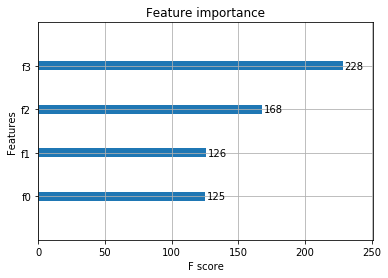

In [21]:
xgb.plot_importance(xgb_model);

In [22]:
df = pd.DataFrame(y_test, columns=['s_price'])
df['p_price'] = preds_prob

In [23]:
df.head(30)

s_price        p_price
264595   120263.0  126259.882812
1686682   95612.0  119603.945312
580796    52350.0  119603.945312
1767395  130390.0   68291.234375
1840264  283593.0  106169.328125
1639487  206280.0  104422.671875
1806751   90084.0  104422.109375
464589    40178.0   68291.234375
1283862  152049.0   68291.234375
999857    70621.0  107633.570312
580687    81664.0  106685.742188
287408    67115.0  119603.945312
243404    71254.0  119603.945312
1286953  121292.0  236717.906250
694896    88573.0  119603.945312
799071   311721.0  119603.945312
1182936  129213.0  207939.984375
900835    90870.0  124382.070312
1128581   47310.0  119603.945312
276866   247704.0  119603.945312
1779449  107281.0  124382.070312
1656498  125403.0  172120.953125
531056   108972.0   73069.359375
1717759   68823.0  119603.945312
1451803  195336.0  119603.945312
1278116   53986.0   68291.234375
513535    35173.0   68291.234375
582027   240080.0  232699.187500
345022   118669.0  124382.070312
736915    39271.0  119603.945312

In [3]:
from catboost import CatBoos

In [4]:
data_features = data_df.drop(columns=['s_country', 'nt_fp', 'event_date'])
X = data_features
y =  data_df['s_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [5]:
ctb = CatBoostClassifier(random_seed=17, loss_function='MultiClass')
cat_features_idx = np.where(X_train.dtypes == 'object')[0].tolist()

In [6]:
data_features.head()

a_month   s_price  s_adults  s_children  ip_lat  ip_long
0       3   81322.0         2           0      47        8
1       3   83773.0         2           0      47        8
2       3   88856.0         2           0      54       48
3       3   85989.0         2           0      43      132
4       3  104442.0         2           0      43      132

In [7]:
cat_features_idx

[0]

In [ ]:
%%time
ctb.fit(X_train, y_train, cat_features=cat_features_idx);